<a href="https://colab.research.google.com/github/moshekranc-git/pythonplayground/blob/master/santandar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

from collections import Counter

# File system manangement
import os

# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Training data shape:  (6948, 202)


Head
    ID_code  target    var_0   var_1  ...  var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863  ...   7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473  ...   8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457  ...  -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518  ...  -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834  ...   3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]


dtypes
 ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object


dtype value counts
 float64    200
object       1
int64        1
dtype: int64


Describe

Class=0, Count=6267, Percentage=90.199%
Class=1, Count=681, Percentage=9.801%


float64    200
object       1
int64        1
dtype: int64

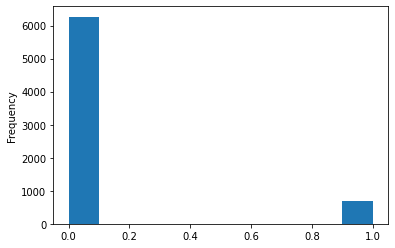

In [4]:
# Training data
app_train = pd.read_csv('train.csv')
print('Training data shape: ', app_train.shape)
print('\n\nHead\n', app_train.head())
print('\n\ndtypes\n', app_train.dtypes)
print('\n\ndtype value counts\n', app_train.dtypes.value_counts())
print('\n\nDescribe\n')
app_train.describe()

# summarize the class distribution
target = app_train['target'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
app_train['target'].astype(int).plot.hist();

# Number of each type of column
app_train.dtypes.value_counts()

very unbalanced! we will have to do something to balance it.

which field is the categorical field?

In [13]:
# select categorical features
  cat_columns = app_train.select_dtypes(include=['object', 'bool']).columns
  print('cat_columns =', cat_columns, '\n')

  # select numerical features
  num_columns = app_train.select_dtypes(include=['int64', 'float64']).columns
  print('num_columns =', num_columns, '\n')


cat_columns = Index(['ID_code'], dtype='object') 

num_columns = Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201) 



it's really an index, starting from 0, disguised as a category by the preceding text 'test_'

In [0]:
# Function to calculate missing values by column 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
        
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [8]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(100)

Your selected dataframe has 202 columns.
There are 105 columns that have missing values.


,Missing Values,% of Total Values
var_95,1,0.0
var_148,1,0.0
var_172,1,0.0
var_171,1,0.0
var_170,1,0.0
...,...,...
var_132,1,0.0
var_131,1,0.0
var_130,1,0.0
var_129,1,0.0


only one missing value for each of 105 columns. maybe a single row that is half blank?


In [11]:
null_columns=app_train.columns[app_train.isnull().any()]
print(app_train[app_train.isnull().any(axis=1)][null_columns].head())

      var_95  var_96  var_97  var_98  ...  var_196  var_197  var_198  var_199
6947     NaN     NaN     NaN     NaN  ...      NaN      NaN      NaN      NaN

[1 rows x 105 columns]


so it is one row that has all the blanks - row 6947 - should be deleted


 target 


 var_0 


 var_1 


 var_2 


 var_3 


 var_4 


 var_5 


 var_6 


 var_7 


 var_8 


 var_9 


 var_10 


 var_11 


 var_12 


 var_13 


 var_14 


 var_15 


 var_16 


 var_17 


 var_18 


 var_19 


 var_20 


 var_21 


 var_22 


 var_23 


 var_24 


 var_25 



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)



 var_26 


 var_27 


 var_28 


 var_29 


 var_30 


 var_31 


 var_32 


 var_33 


 var_34 


 var_35 


 var_36 


 var_37 


 var_38 


 var_39 


 var_40 


 var_41 


 var_42 


 var_43 


 var_44 


 var_45 


 var_46 


 var_47 


 var_48 


 var_49 


 var_50 


 var_51 


 var_52 


 var_53 


 var_54 


 var_55 


 var_56 


 var_57 


 var_58 


 var_59 


 var_60 


 var_61 


 var_62 


 var_63 


 var_64 


 var_65 


 var_66 


 var_67 


 var_68 


 var_69 


 var_70 


 var_71 


 var_72 


 var_73 


 var_74 


 var_75 


 var_76 


 var_77 


 var_78 


 var_79 


 var_80 


 var_81 


 var_82 


 var_83 


 var_84 


 var_85 


 var_86 


 var_87 


 var_88 


 var_89 


 var_90 


 var_91 


 var_92 


 var_93 


 var_94 


 var_95 


 var_96 


 var_97 


 var_98 


 var_99 


 var_100 


 var_101 


 var_102 


 var_103 


 var_104 


 var_105 


 var_106 


 var_107 


 var_108 


 var_109 


 var_110 


 var_111 


 var_112 


 var_113 


 var_114 


 var_

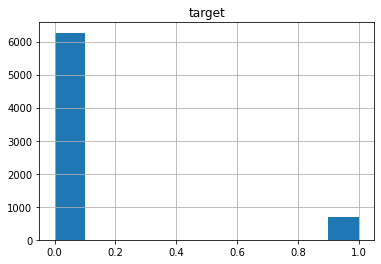

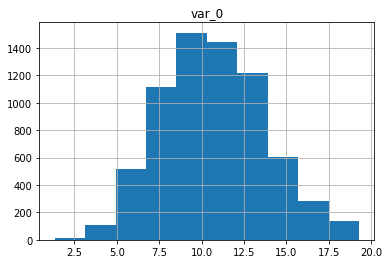

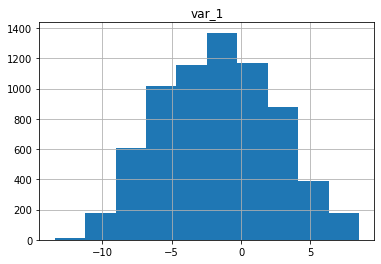

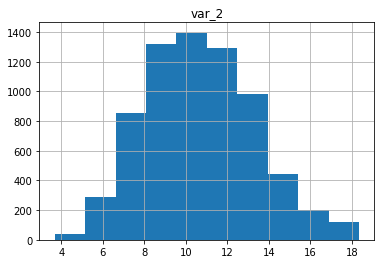

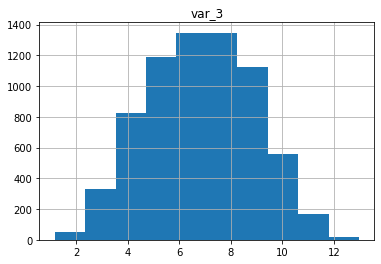

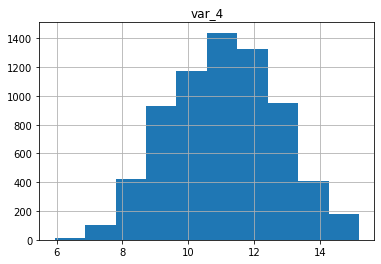

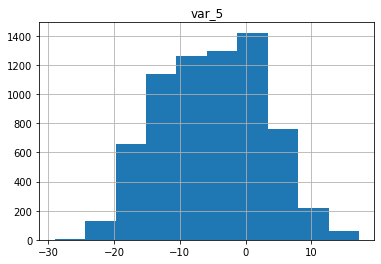

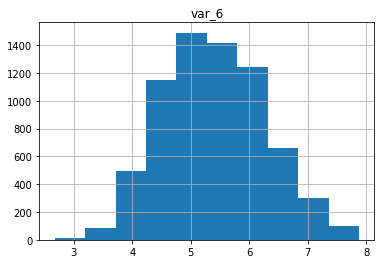

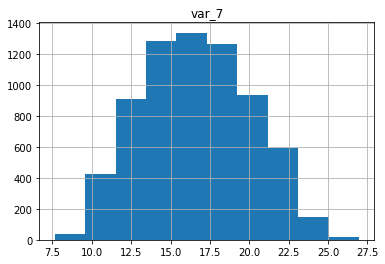

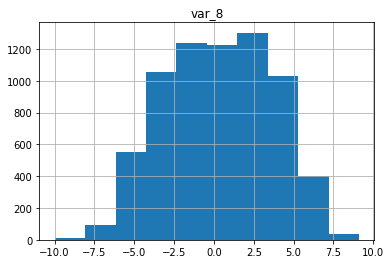

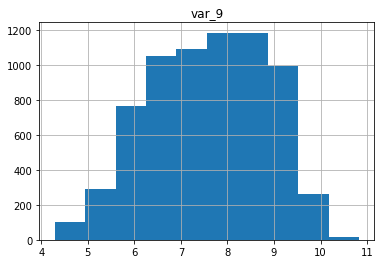

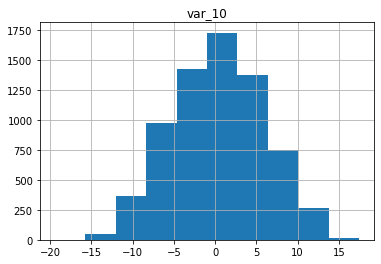

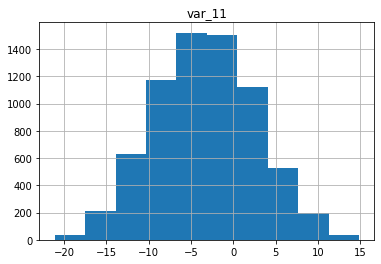

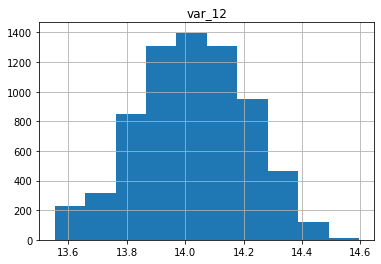

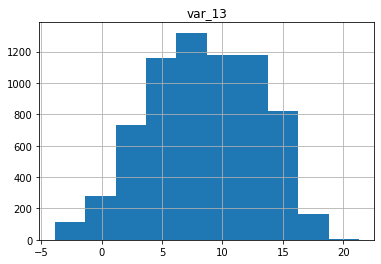

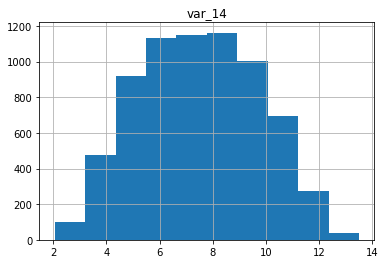

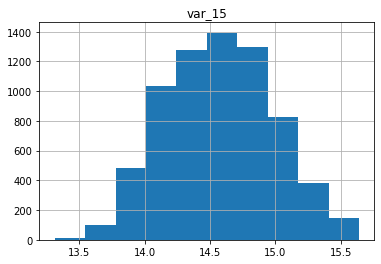

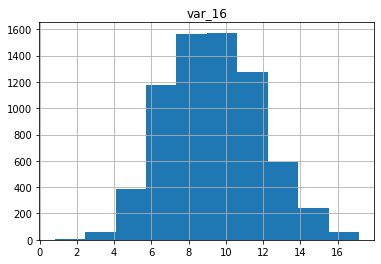

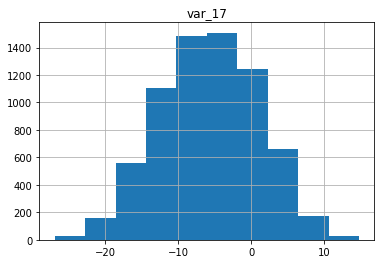

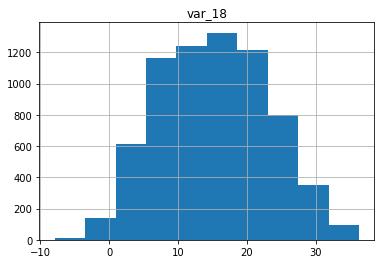

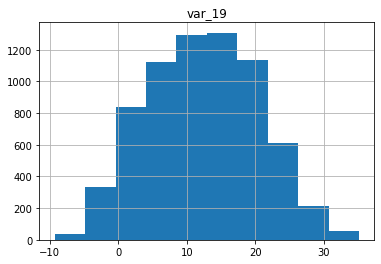

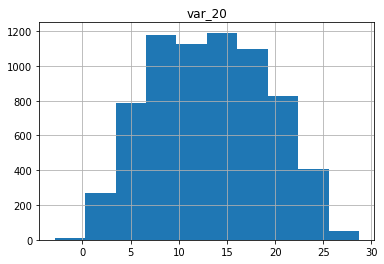

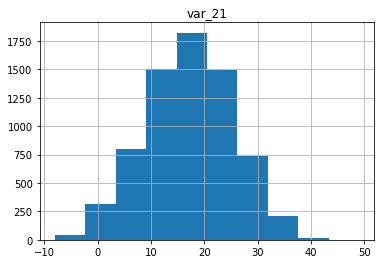

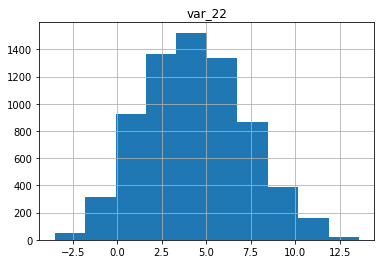

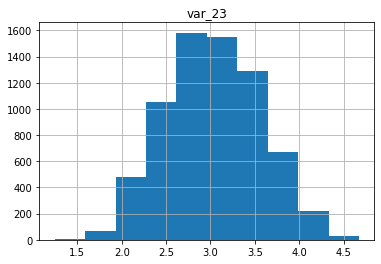

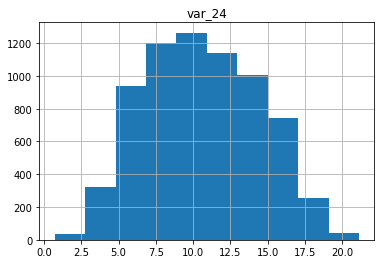

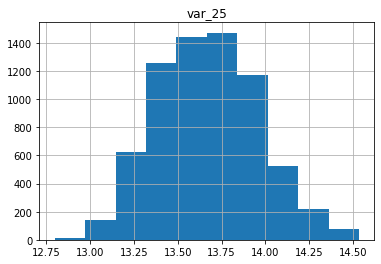

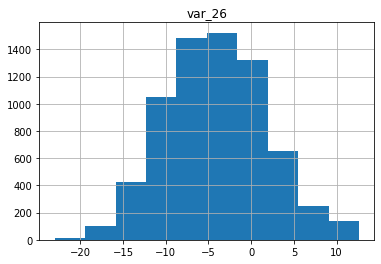

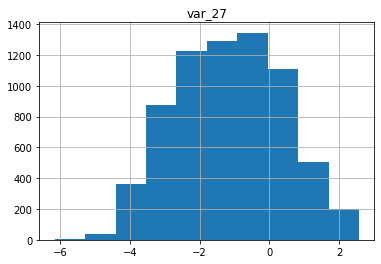

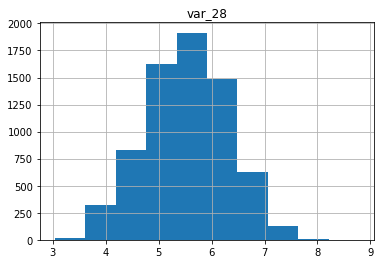

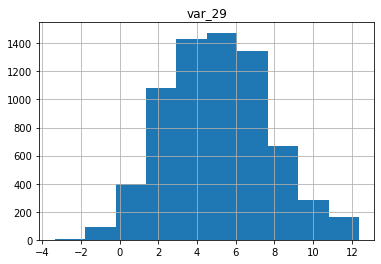

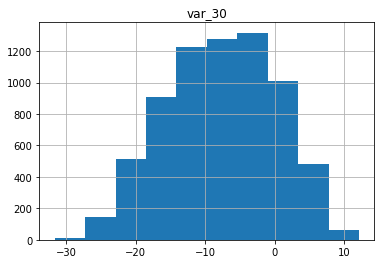

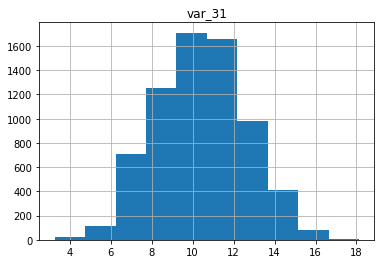

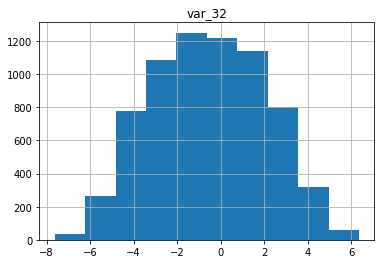

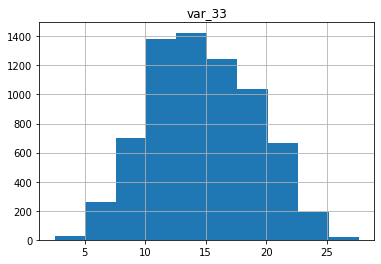

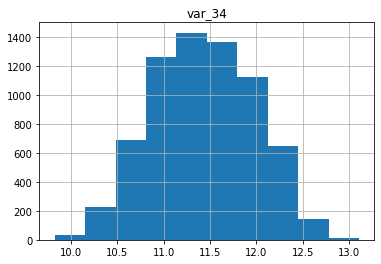

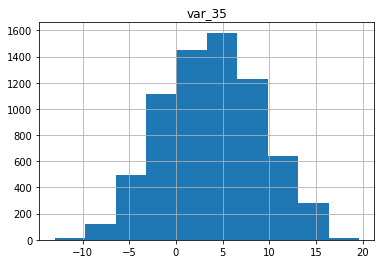

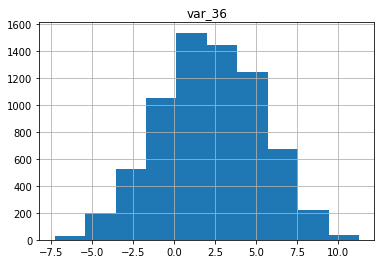

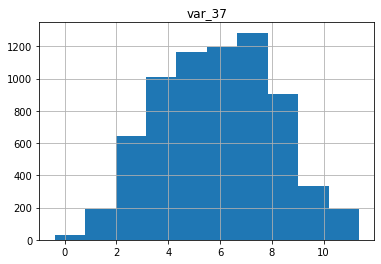

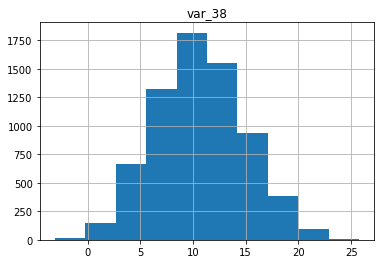

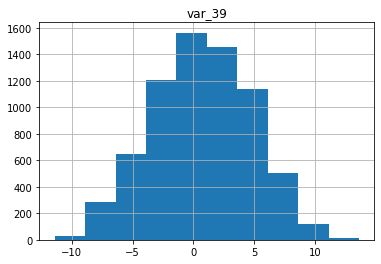

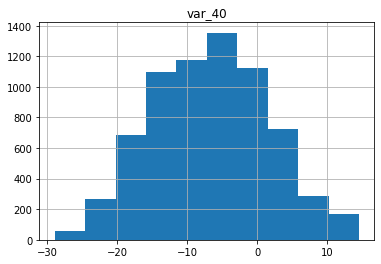

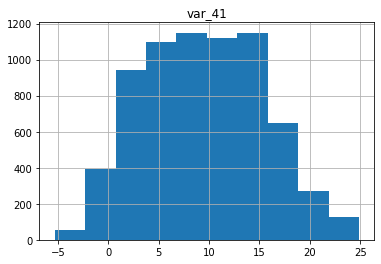

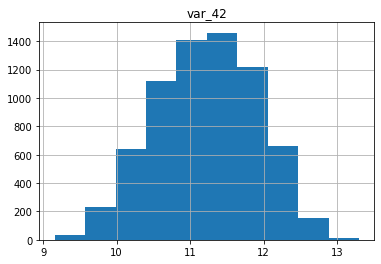

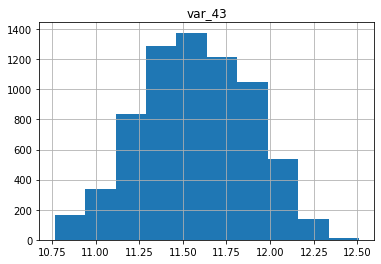

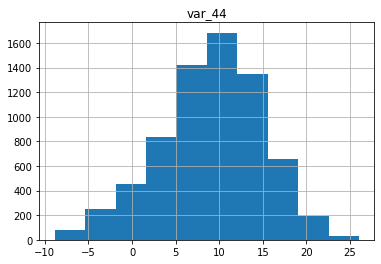

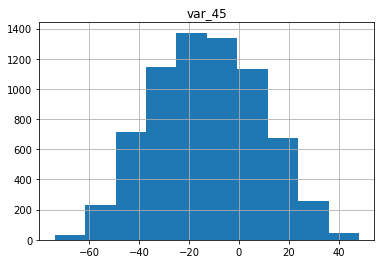

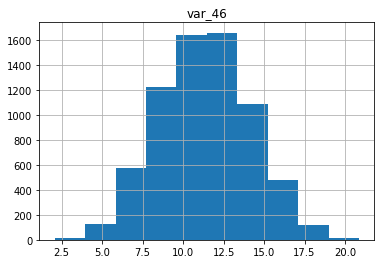

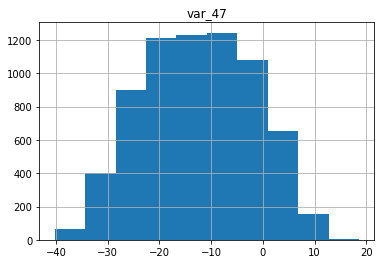

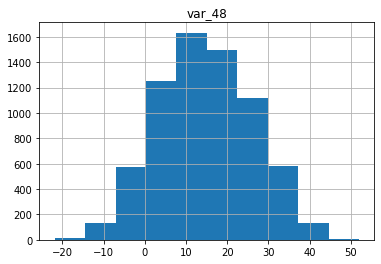

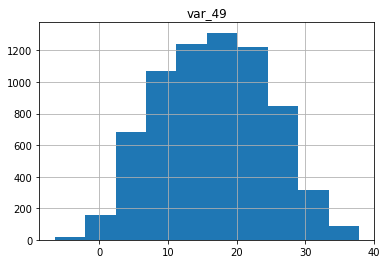

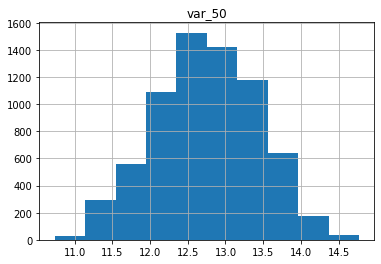

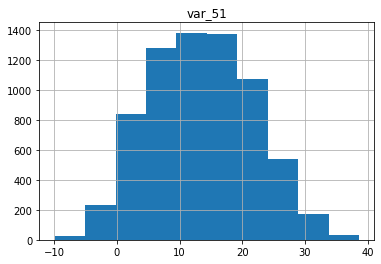

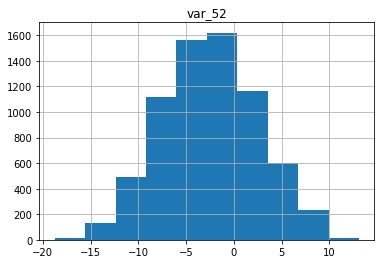

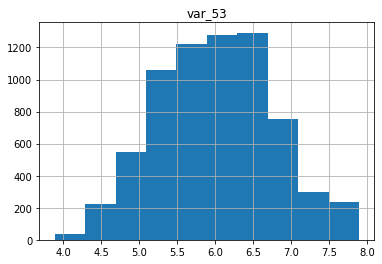

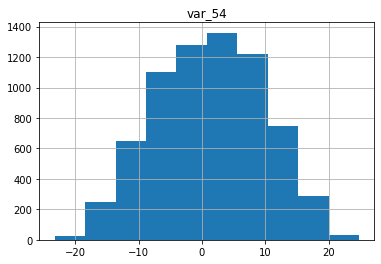

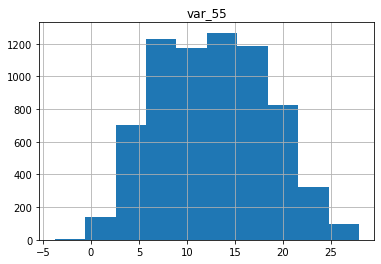

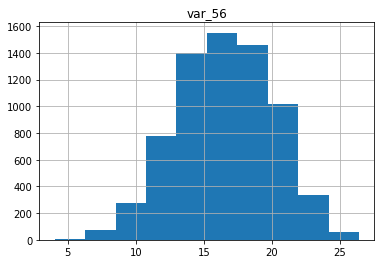

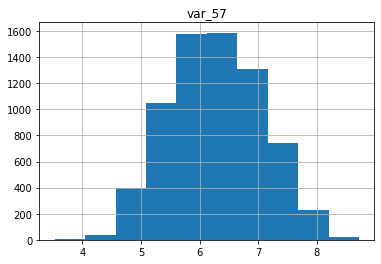

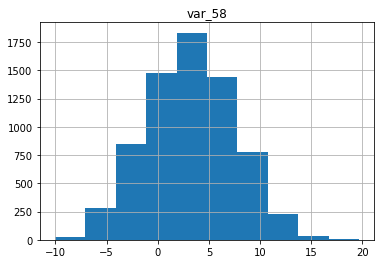

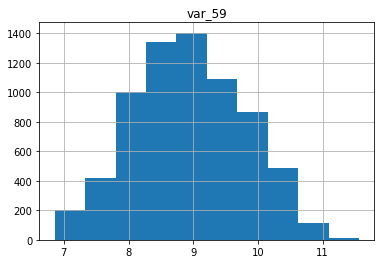

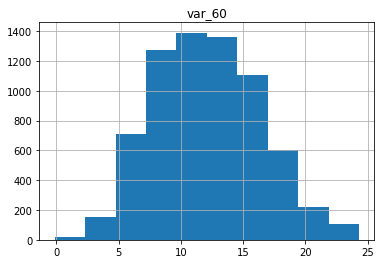

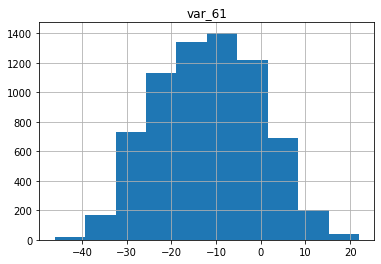

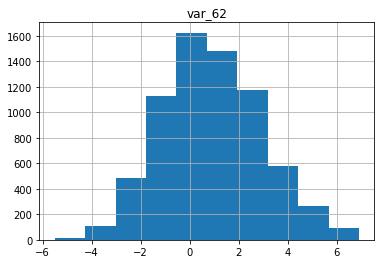

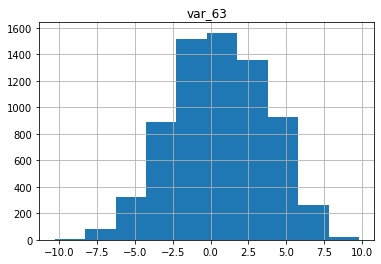

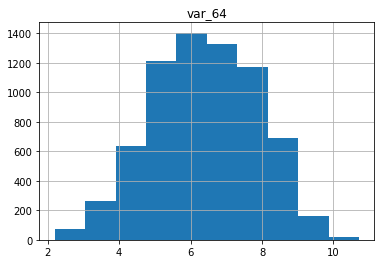

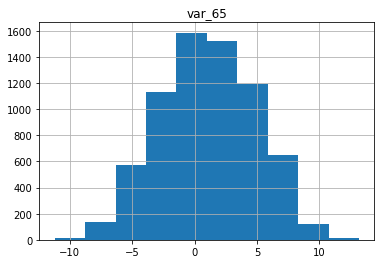

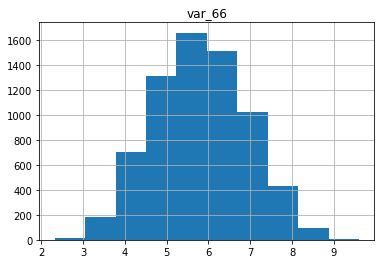

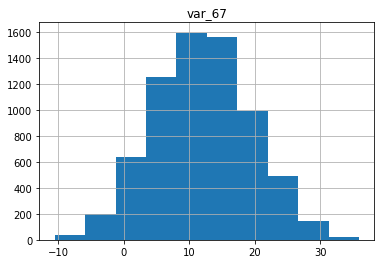

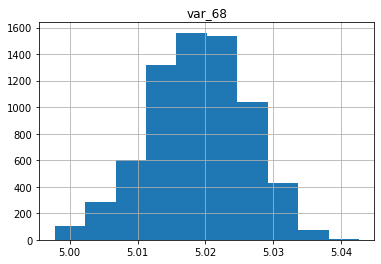

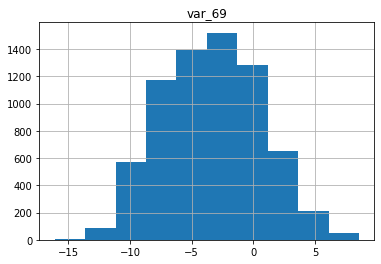

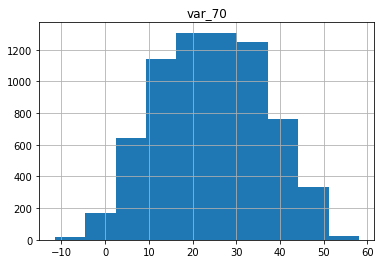

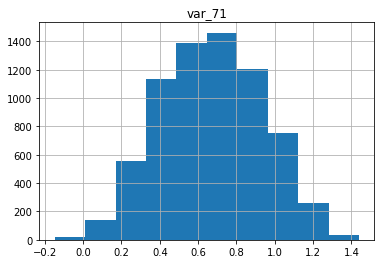

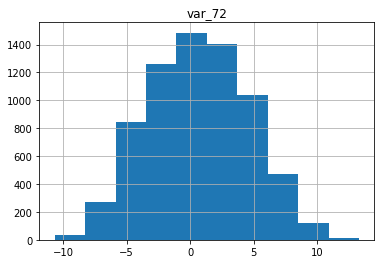

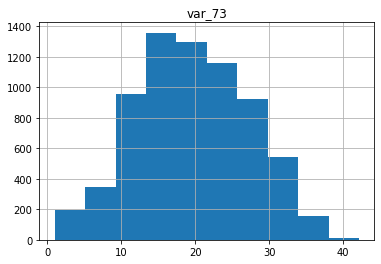

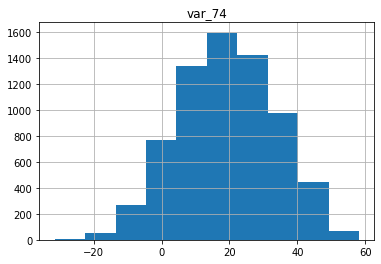

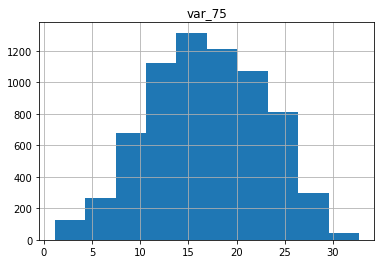

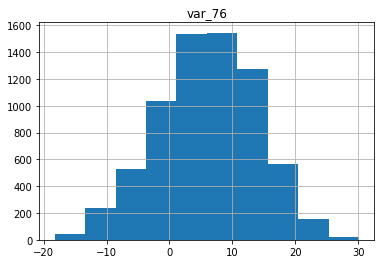

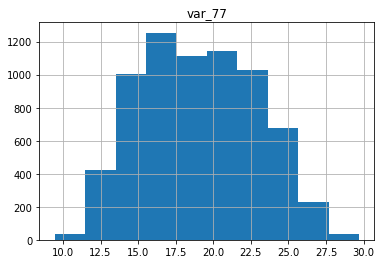

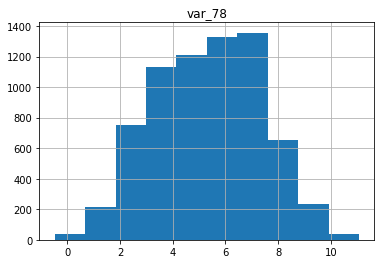

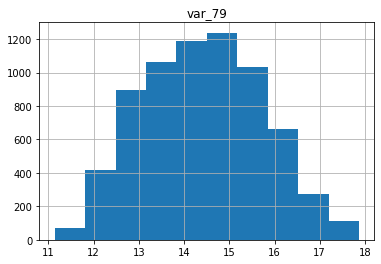

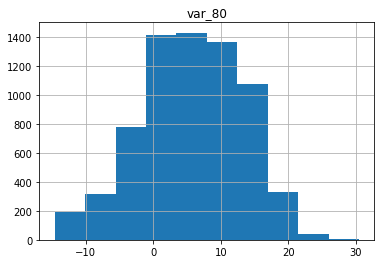

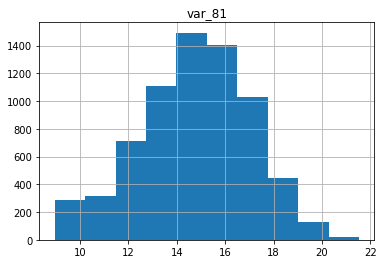

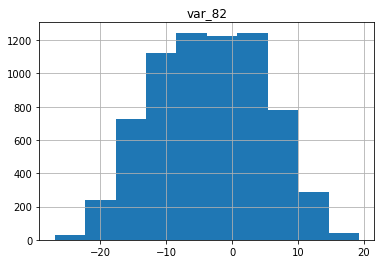

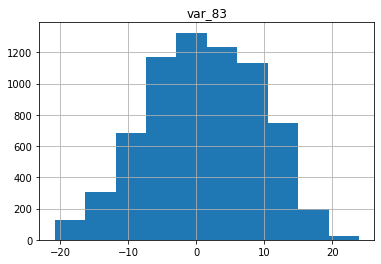

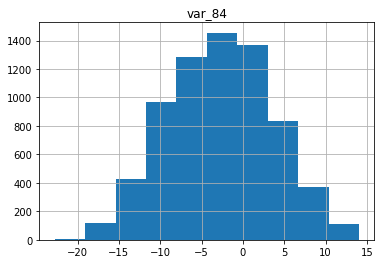

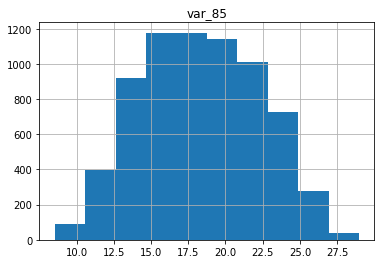

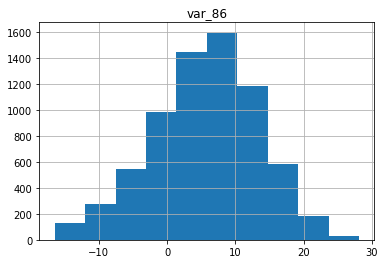

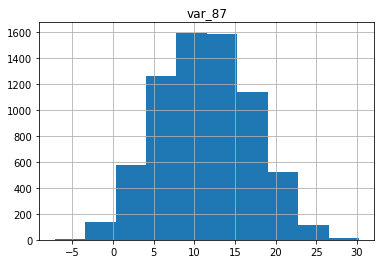

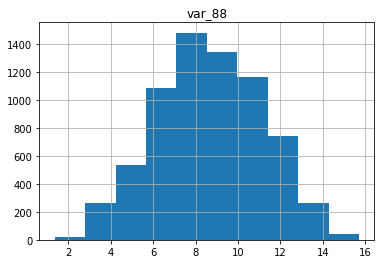

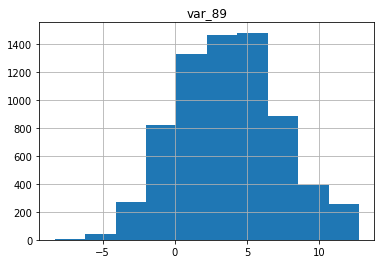

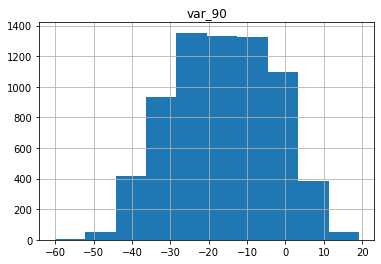

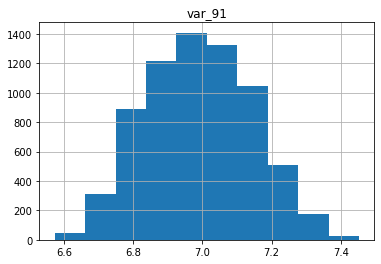

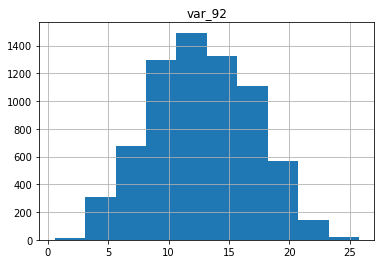

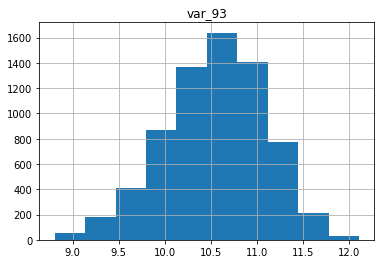

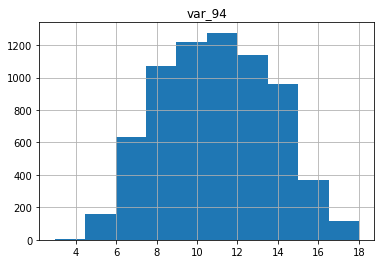

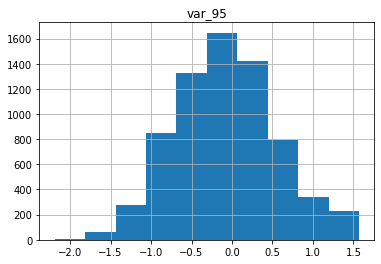

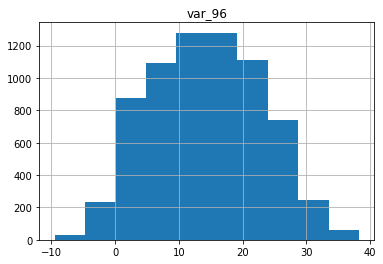

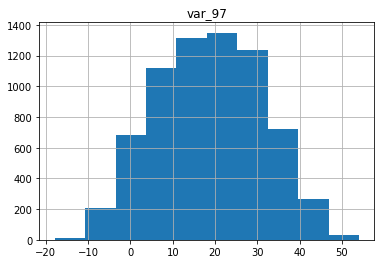

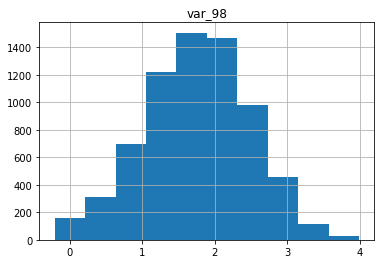

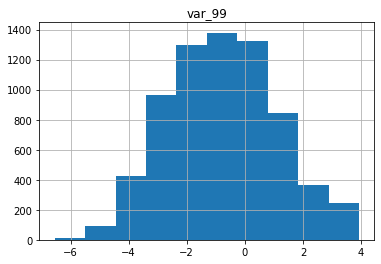

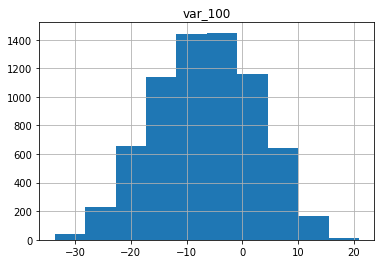

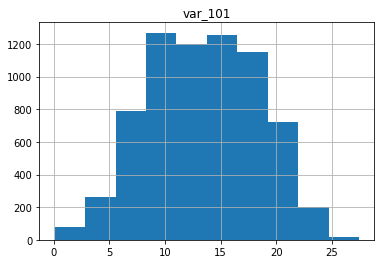

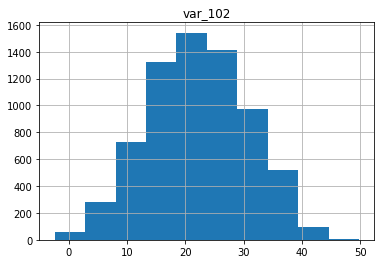

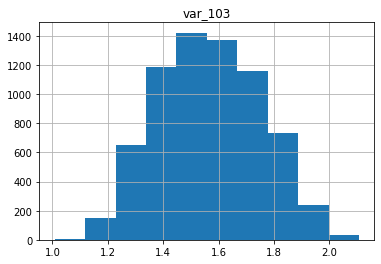

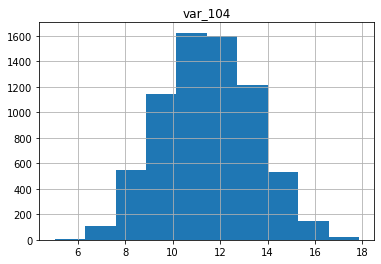

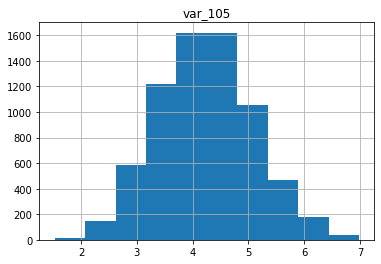

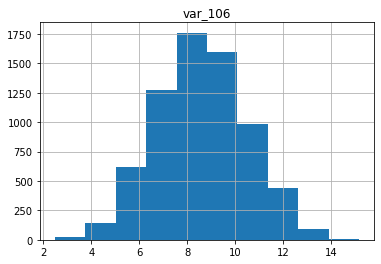

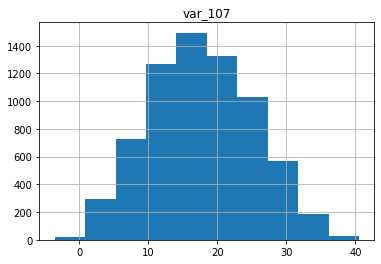

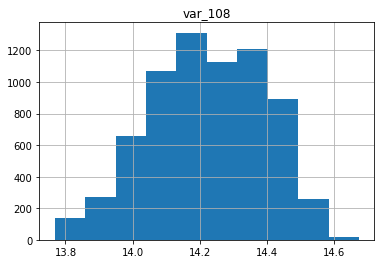

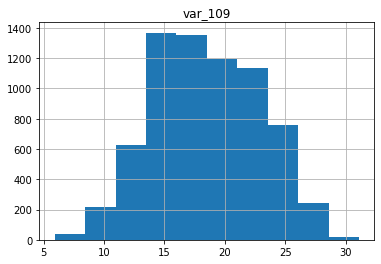

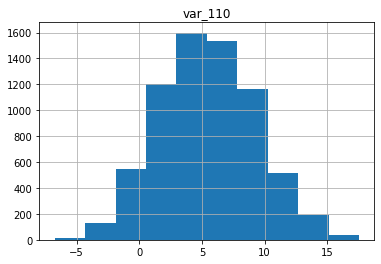

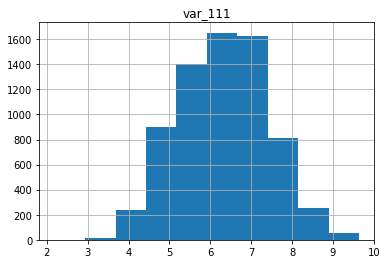

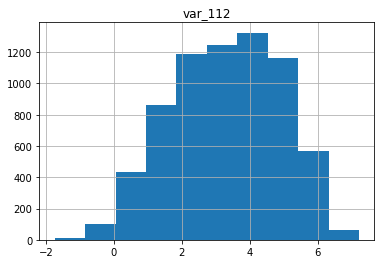

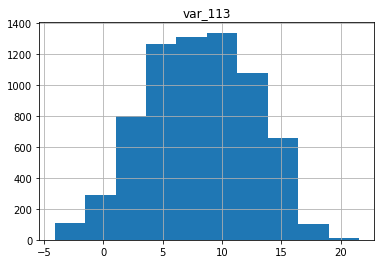

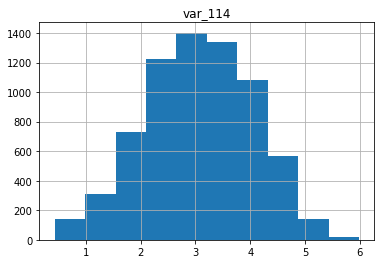

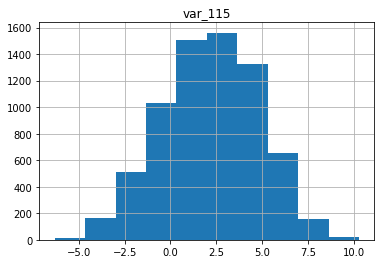

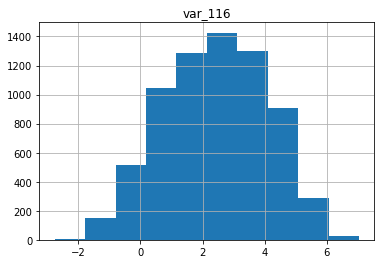

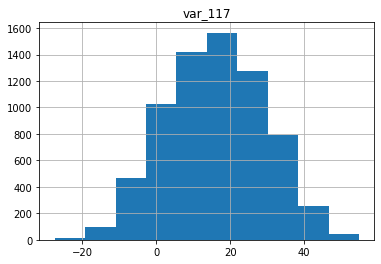

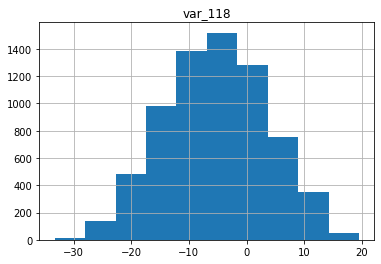

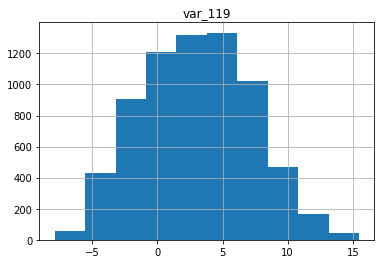

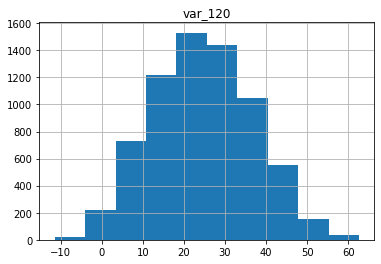

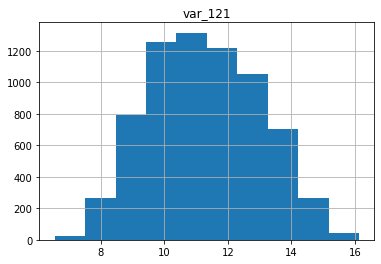

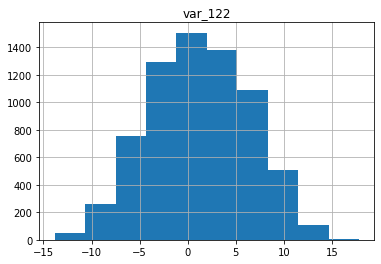

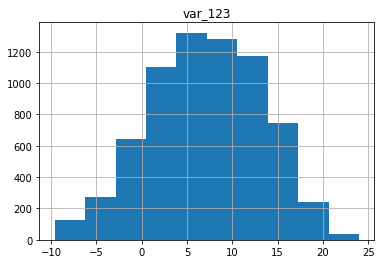

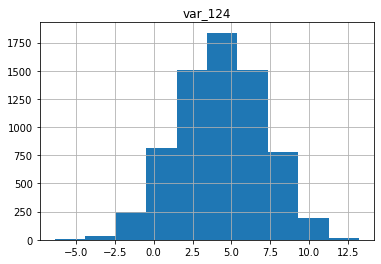

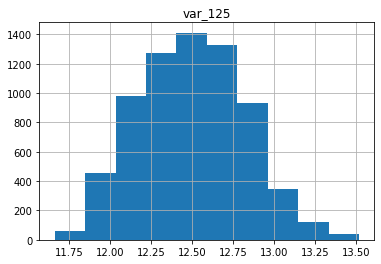

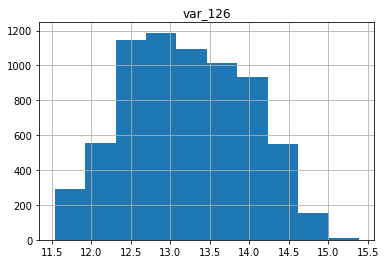

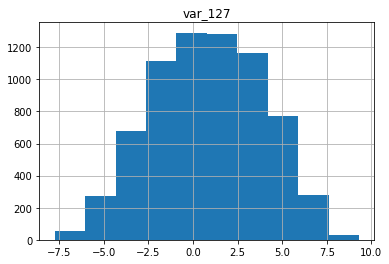

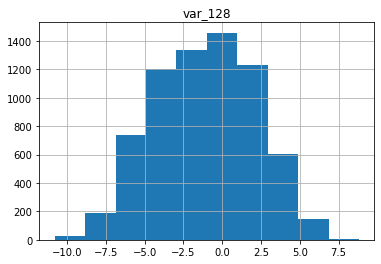

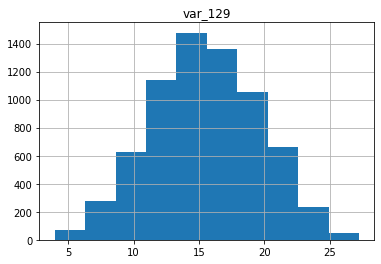

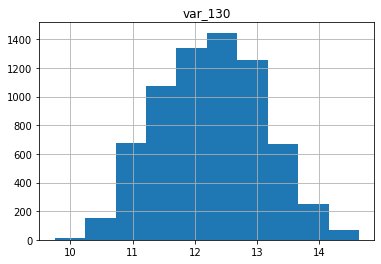

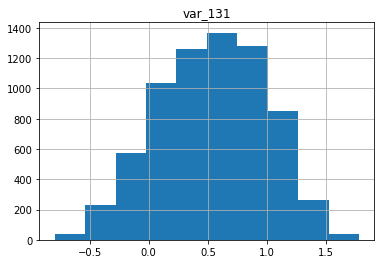

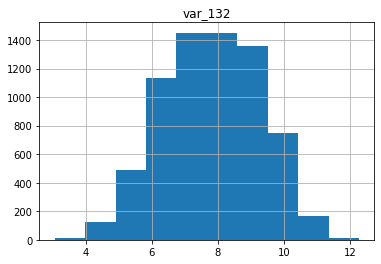

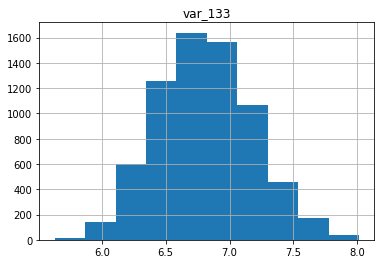

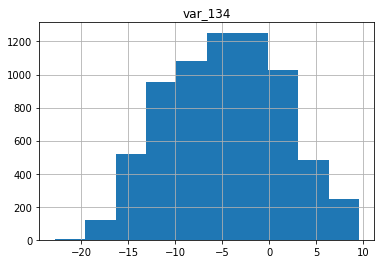

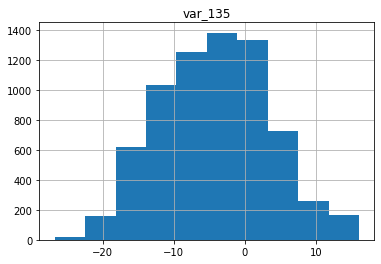

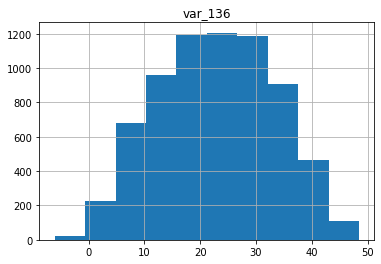

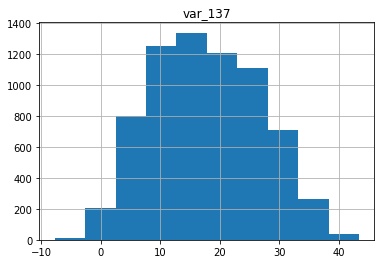

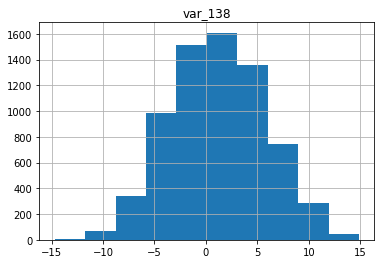

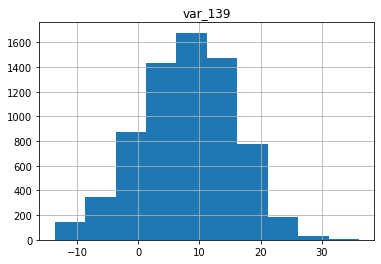

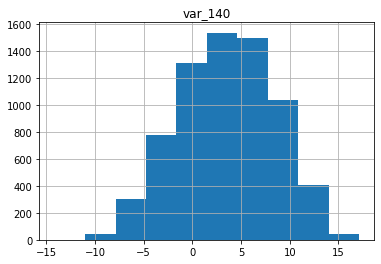

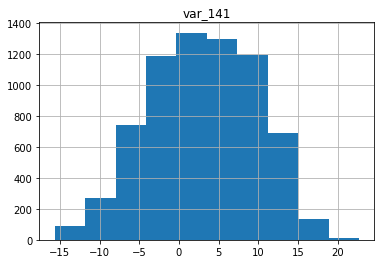

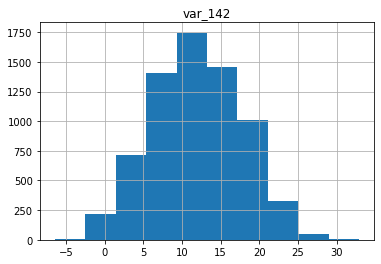

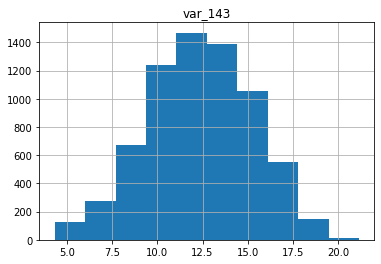

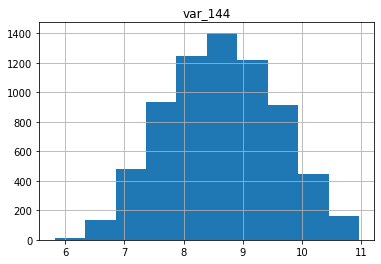

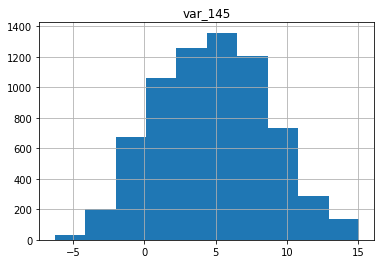

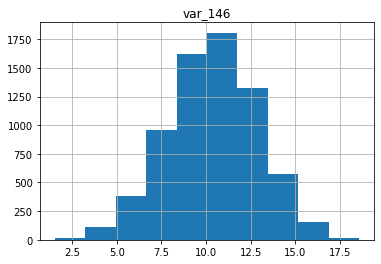

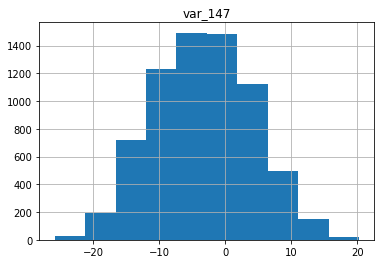

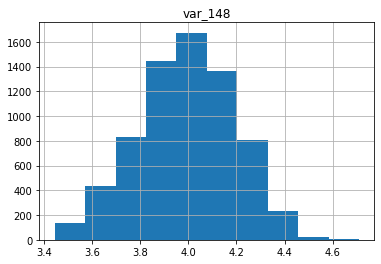

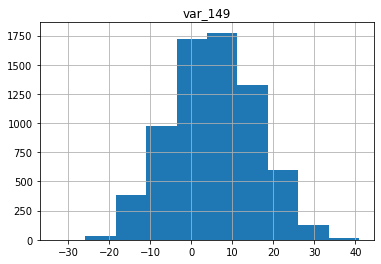

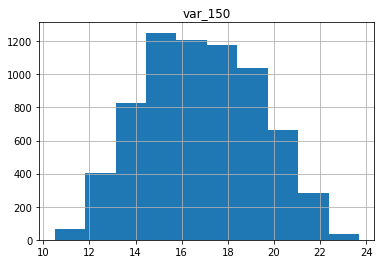

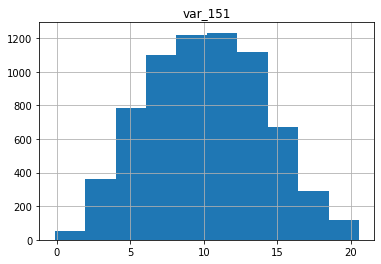

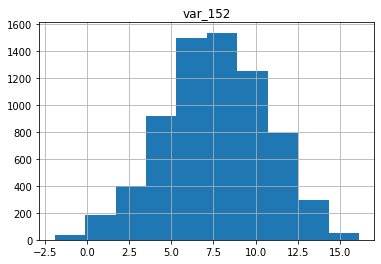

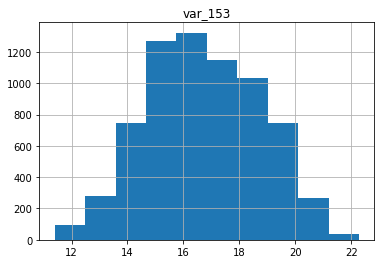

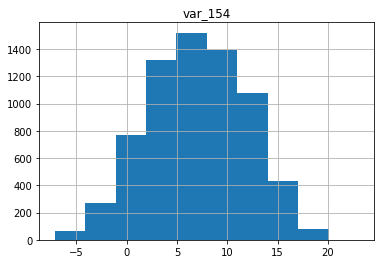

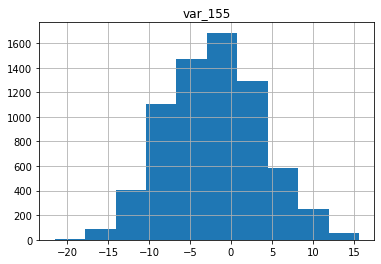

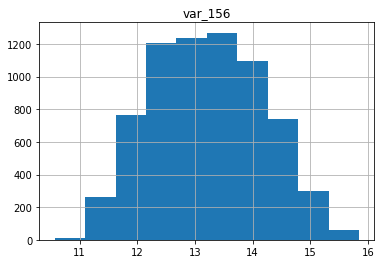

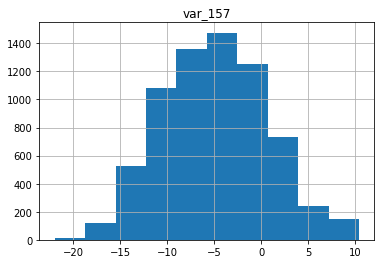

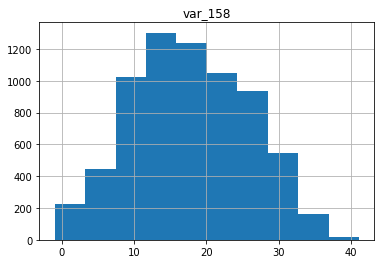

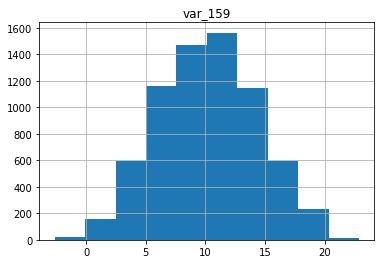

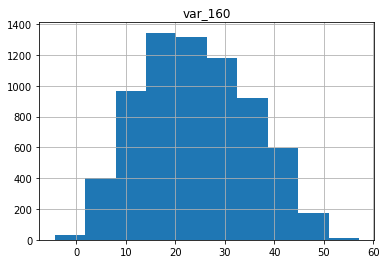

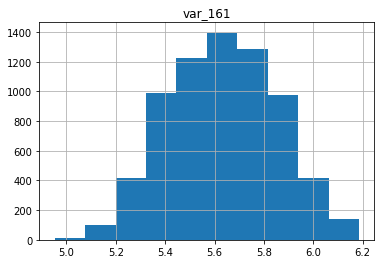

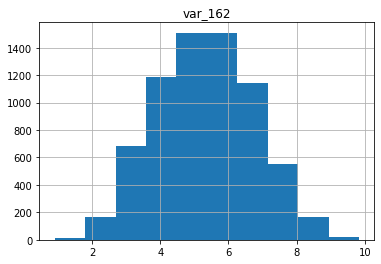

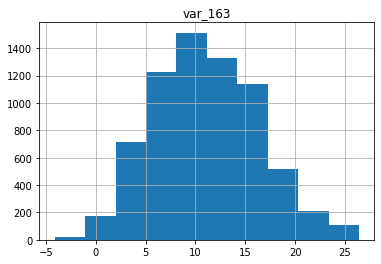

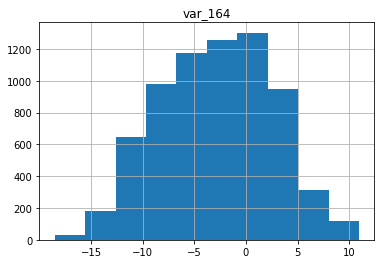

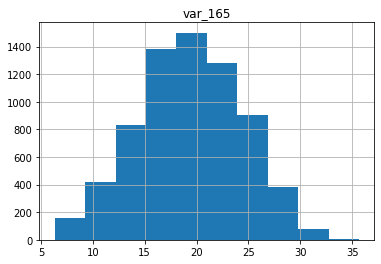

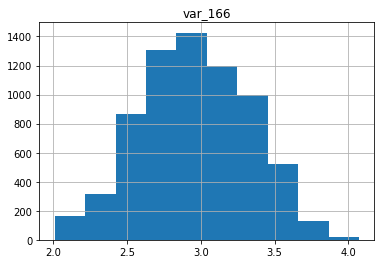

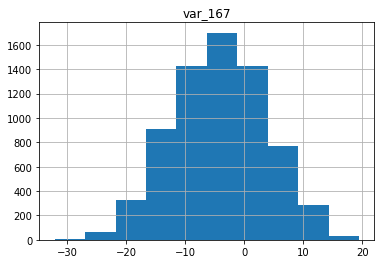

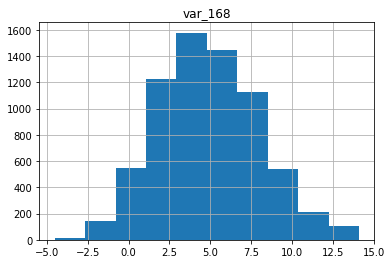

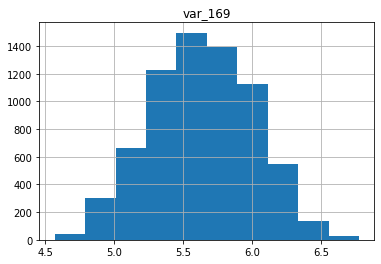

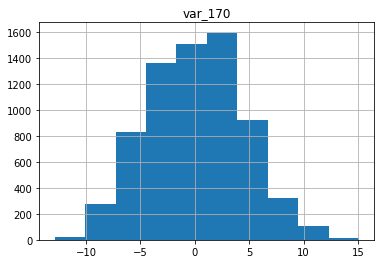

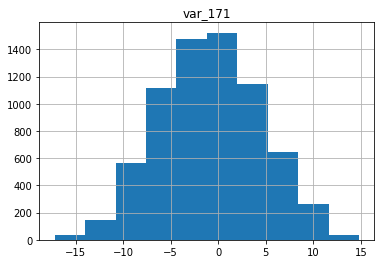

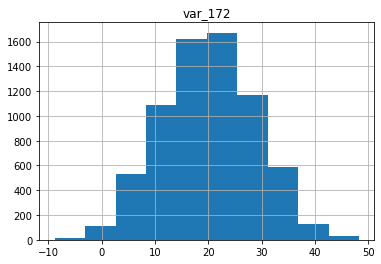

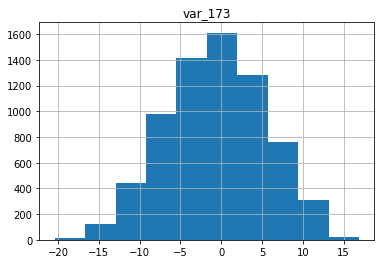

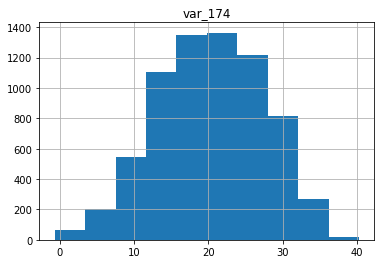

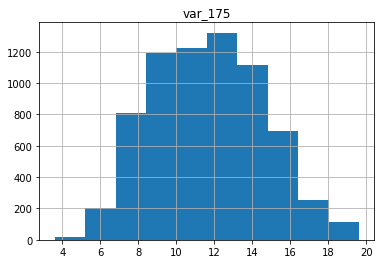

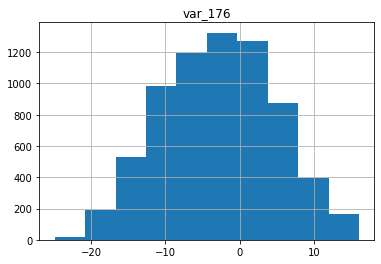

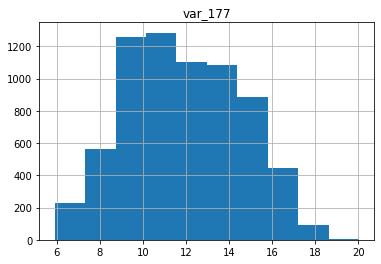

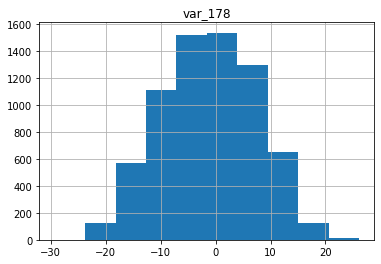

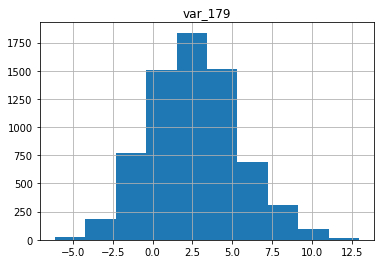

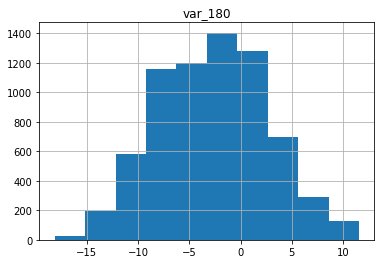

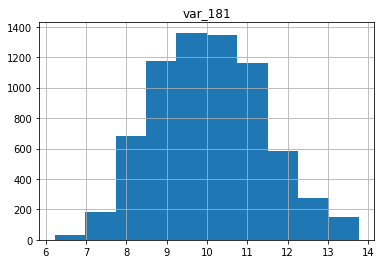

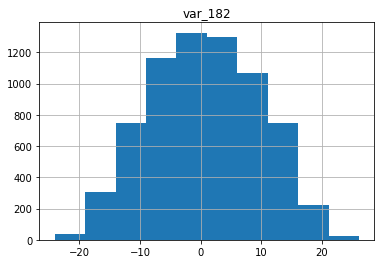

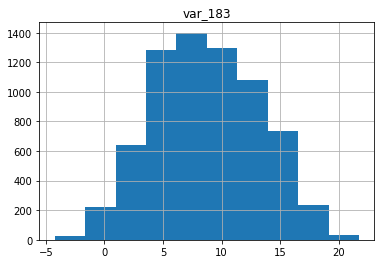

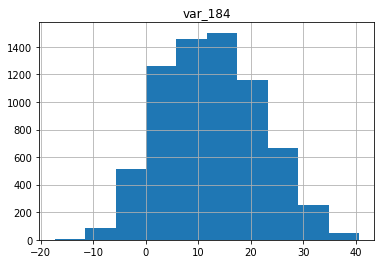

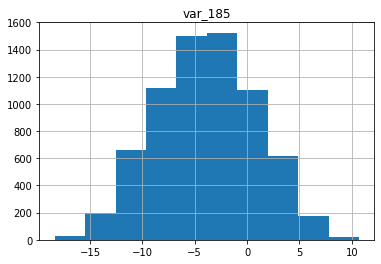

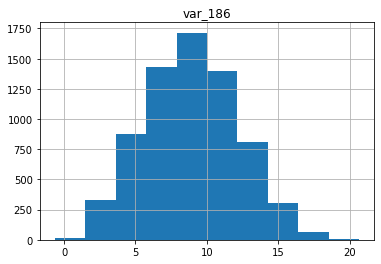

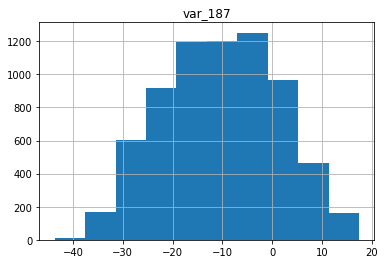

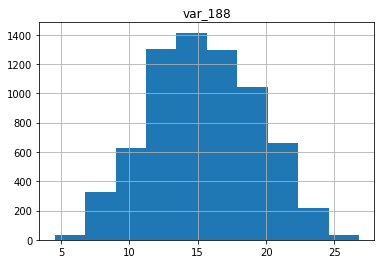

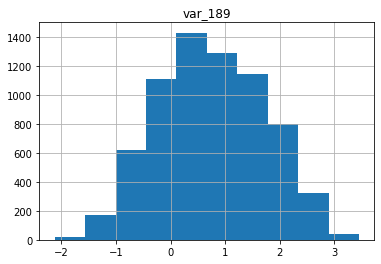

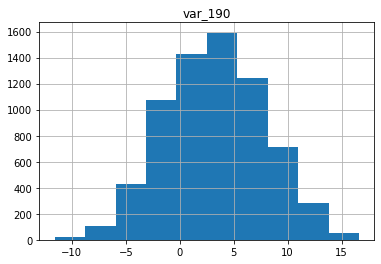

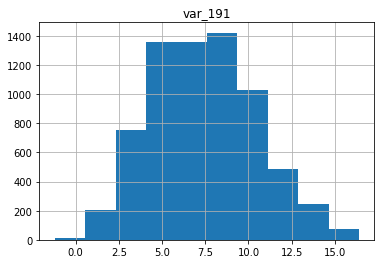

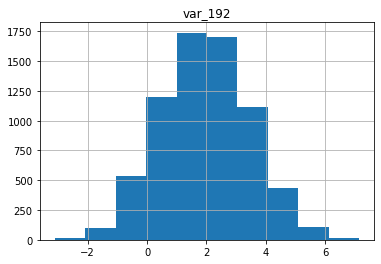

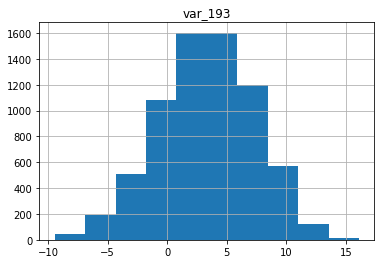

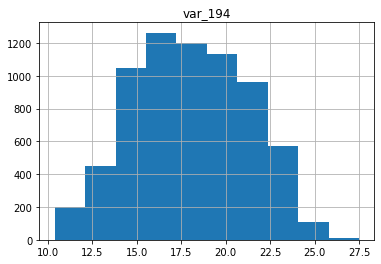

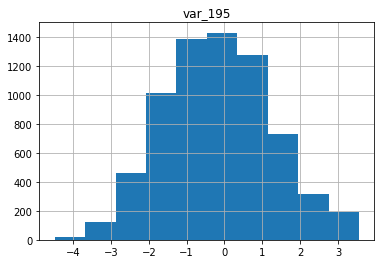

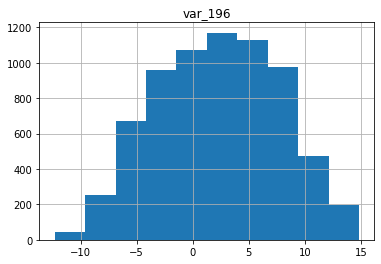

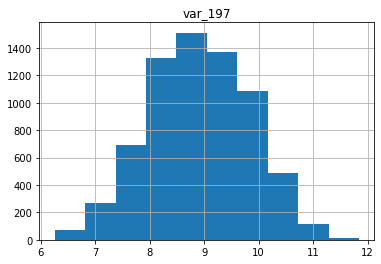

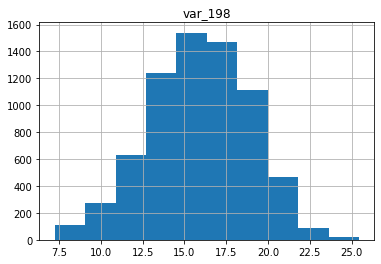

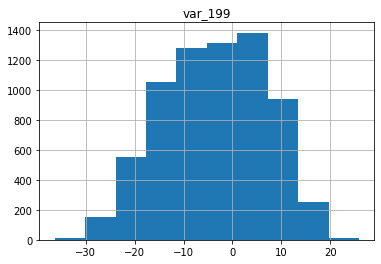

In [14]:
# show histograms of data columns
for col in num_columns:
  print("\n", col, "\n")
  app_train.hist(col)

all the cols seem to have a normal distribution, with no outliers - good!

In [15]:
# Load test data
# Training data
app_test = pd.read_csv('test.csv')
print('Test data shape: ', app_test.shape)
print('\n\nHead\n', app_test.head())
print('\n\ndtypes\n', app_test.dtypes)
print('\n\ndtype value counts\n', app_test.dtypes.value_counts())
print('\n\nDescribe\n')
app_test.describe()

# Number of each type of column
app_test.dtypes.value_counts()

# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values.head(100)

Test data shape:  (200000, 201)


Head
   ID_code    var_0    var_1    var_2  ...  var_196  var_197  var_198  var_199
0  test_0  11.0656   7.7798  12.9536  ...   4.3654  10.7200  15.4722  -8.7197
1  test_1   8.5304   1.2543  11.3047  ...  -1.4852   9.8714  19.1293 -20.9760
2  test_2   5.4827 -10.3581  10.1407  ...  -7.1086   7.0618  19.8956 -23.1794
3  test_3   8.5374  -1.3222  12.0220  ...   3.9567   9.2295  13.0168  -4.2108
4  test_4  11.7058  -0.1327  14.1295  ...  -5.1612   7.2882  13.9260  -9.1846

[5 rows x 201 columns]


dtypes
 ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object


dtype value counts
 float64    200
object       1
dtype: int64


Describe

Your selected dataframe has 201 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


no misisng values - great!

num_columns = Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200) 



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


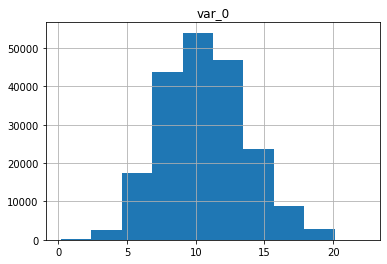

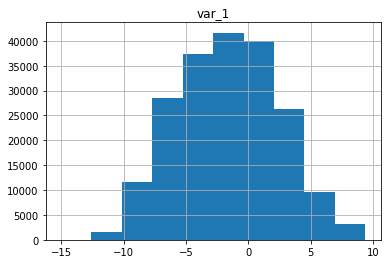

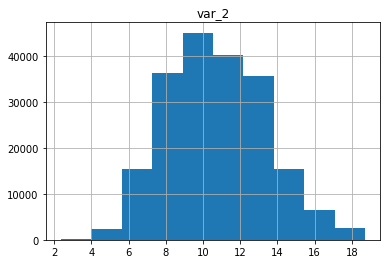

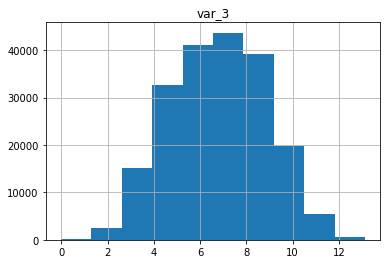

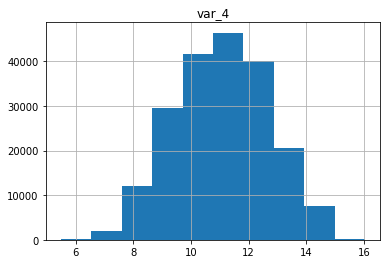

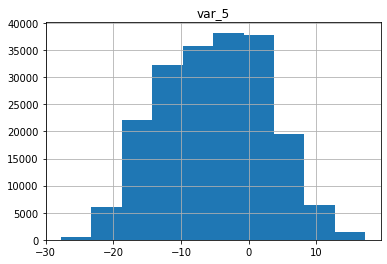

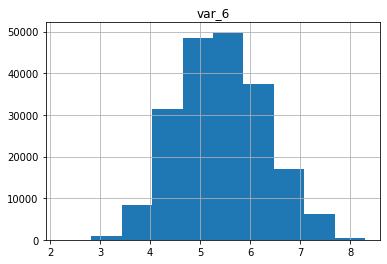

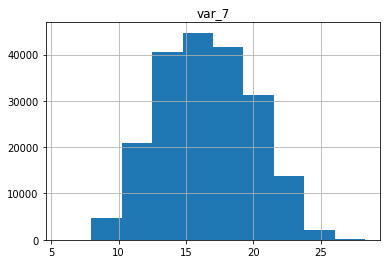

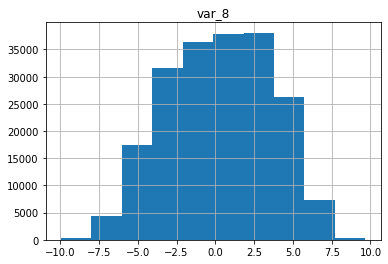

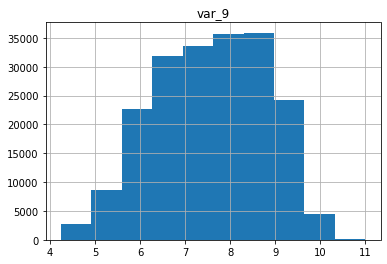

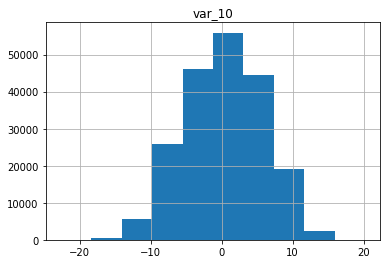

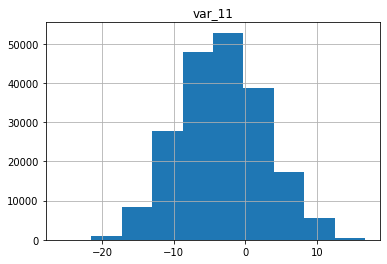

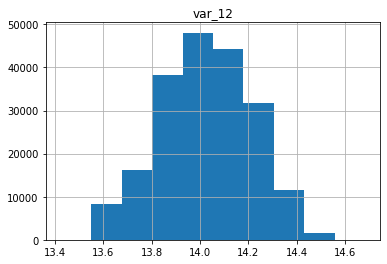

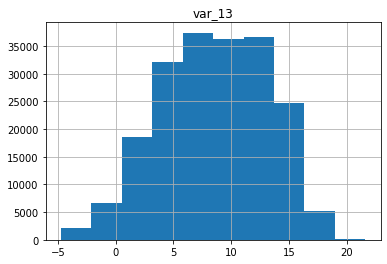

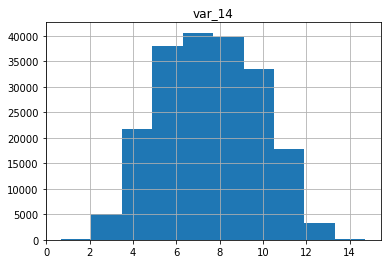

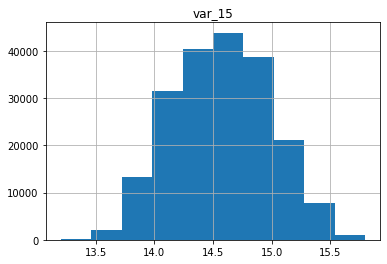

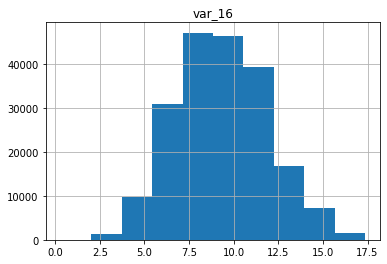

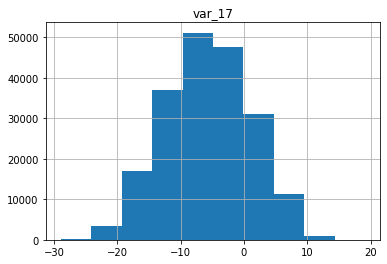

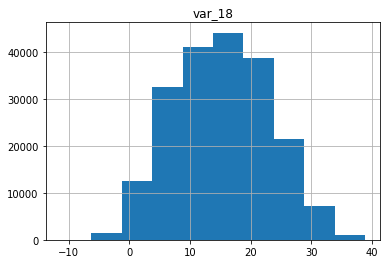

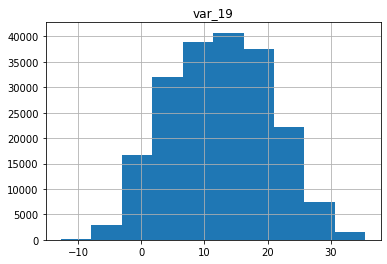

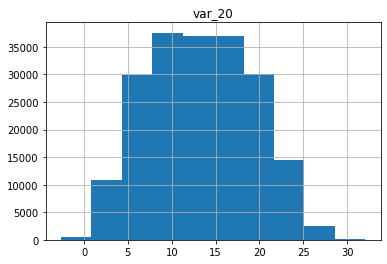

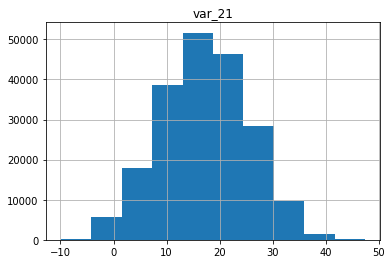

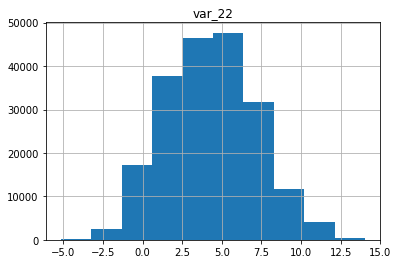

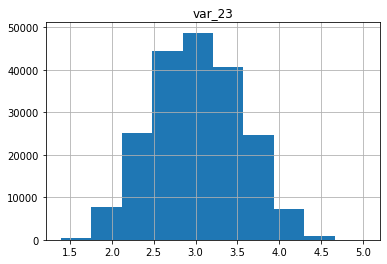

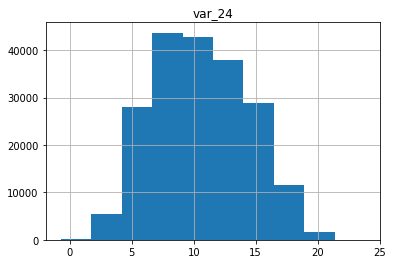

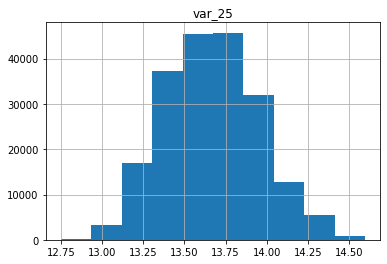

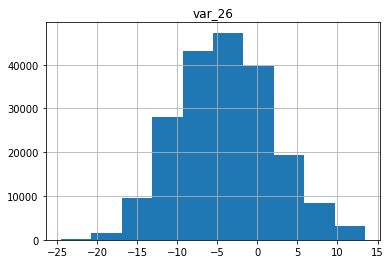

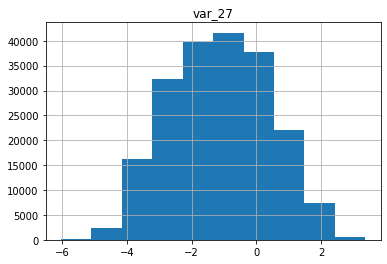

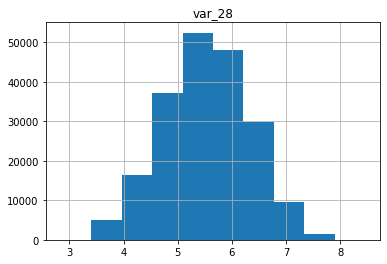

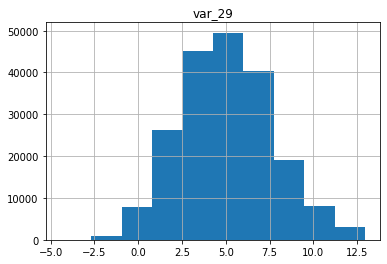

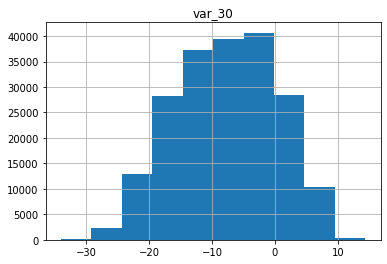

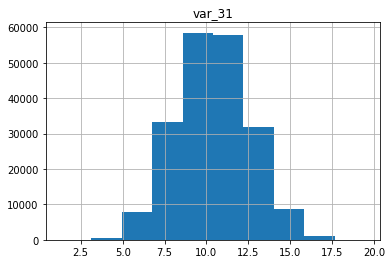

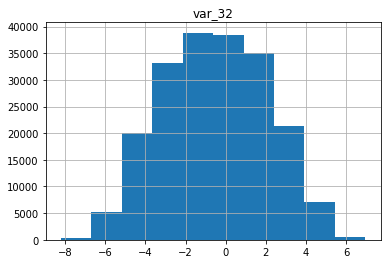

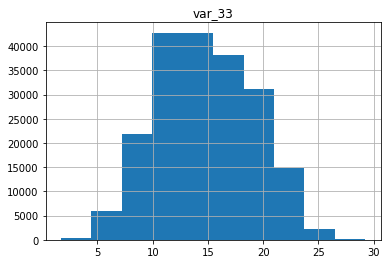

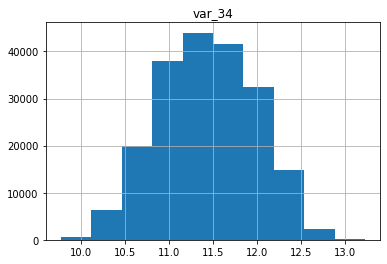

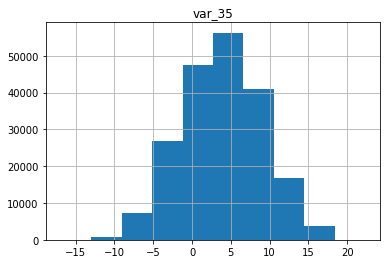

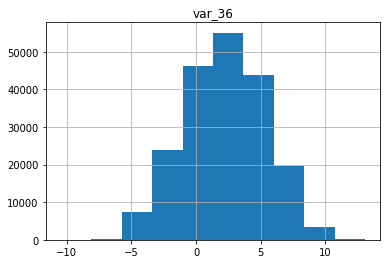

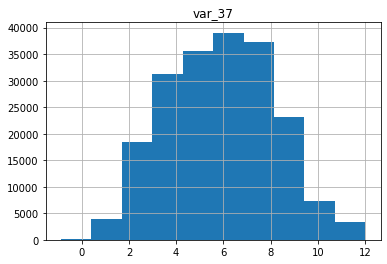

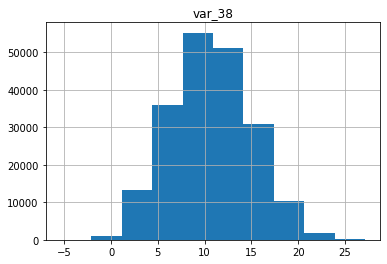

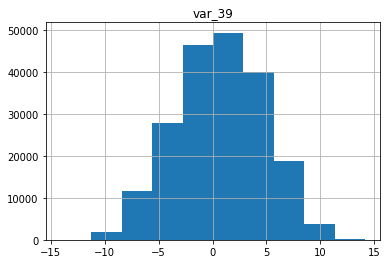

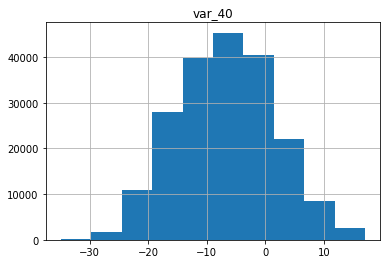

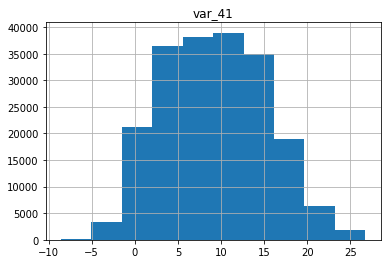

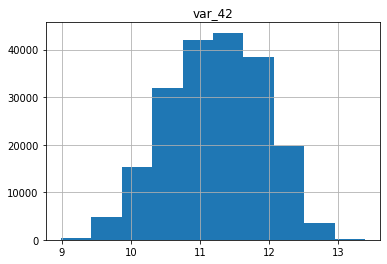

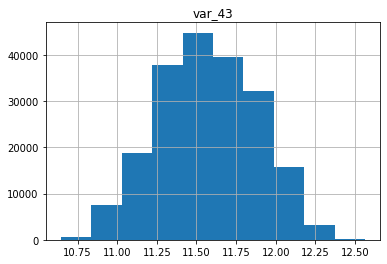

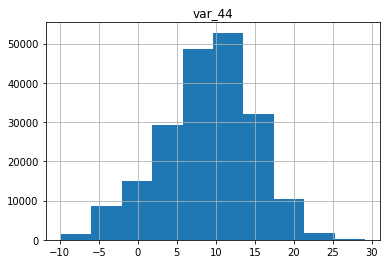

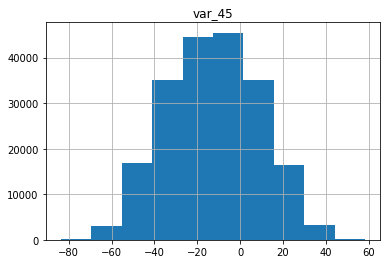

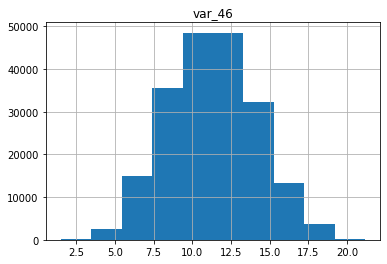

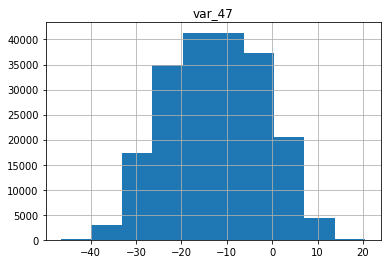

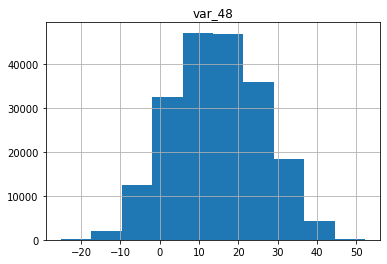

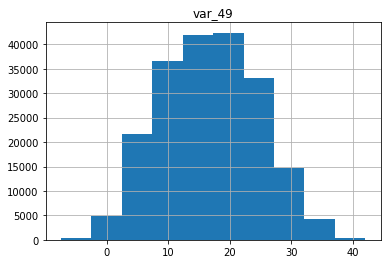

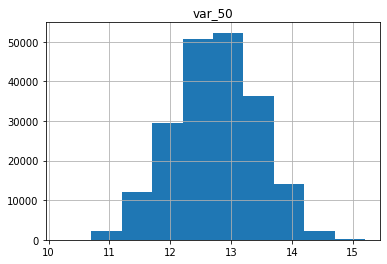

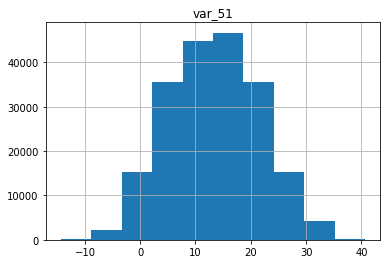

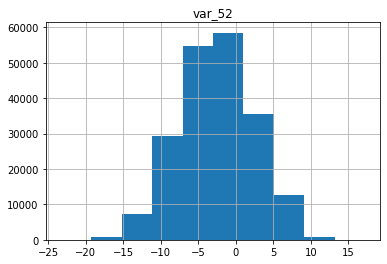

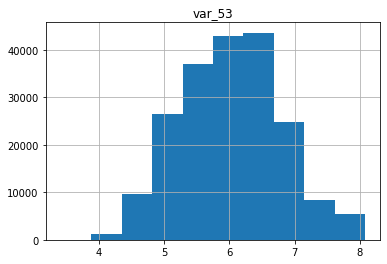

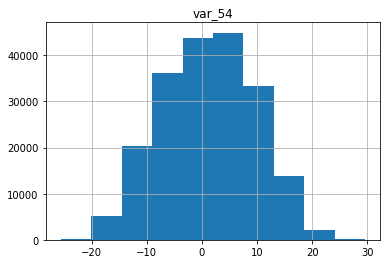

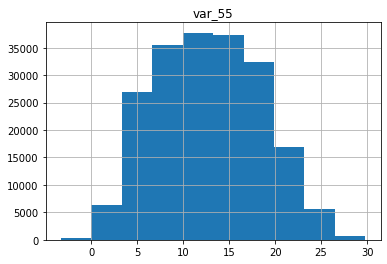

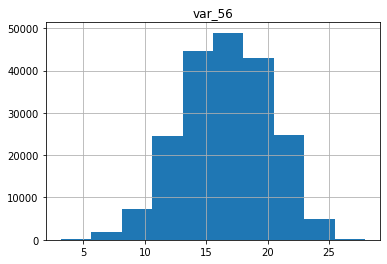

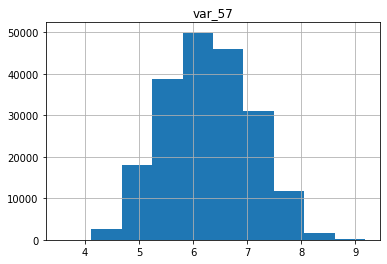

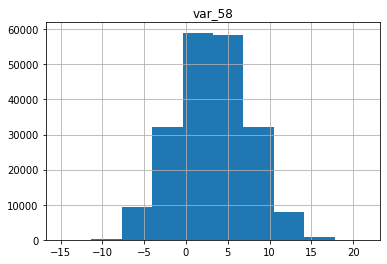

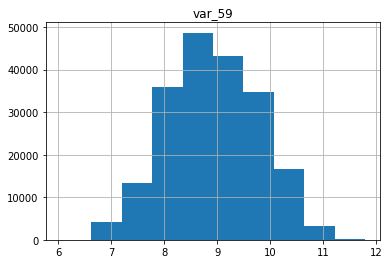

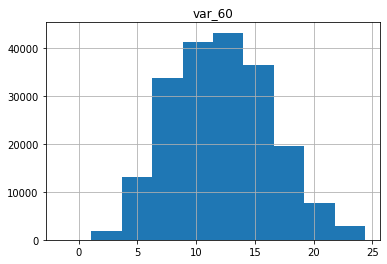

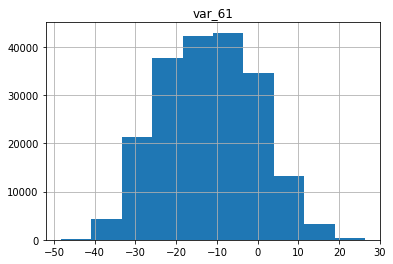

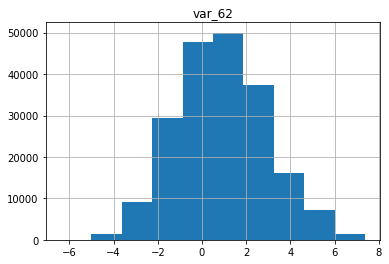

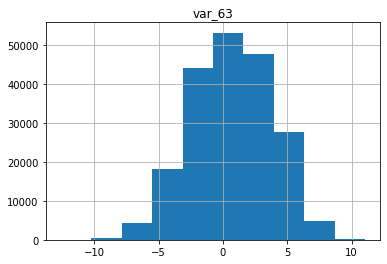

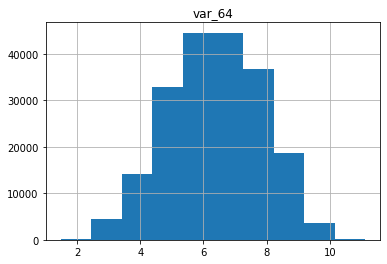

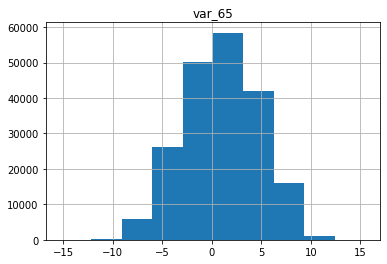

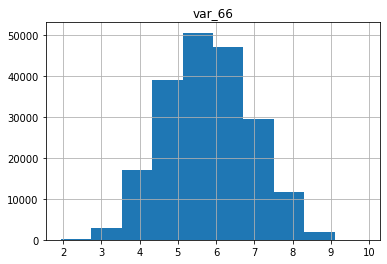

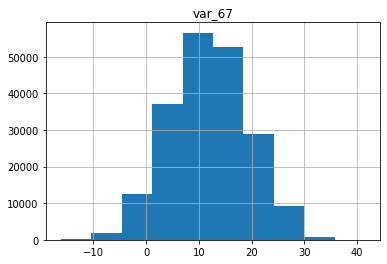

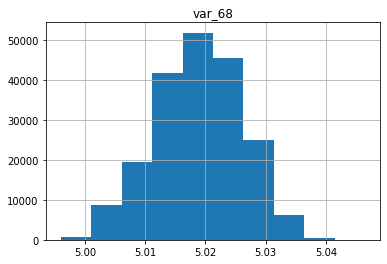

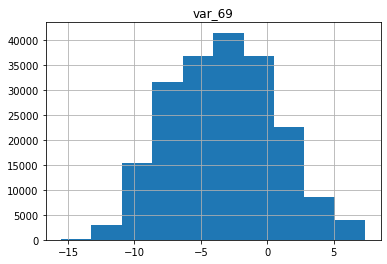

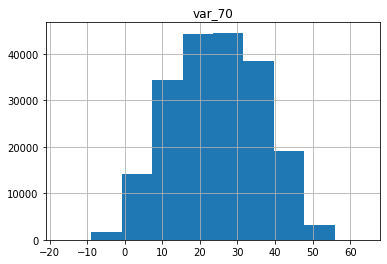

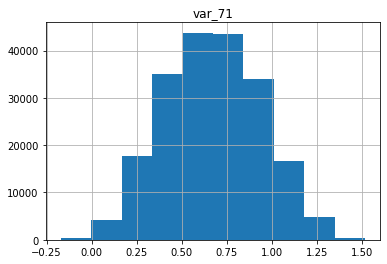

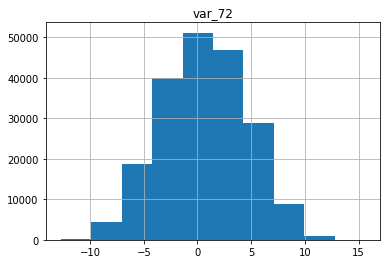

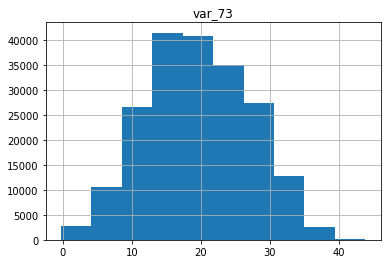

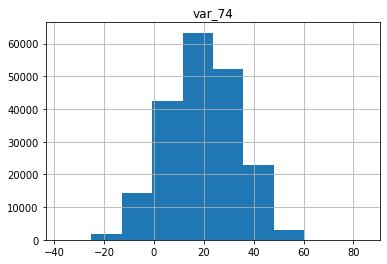

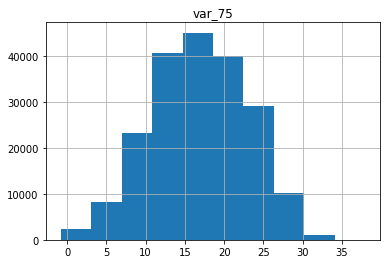

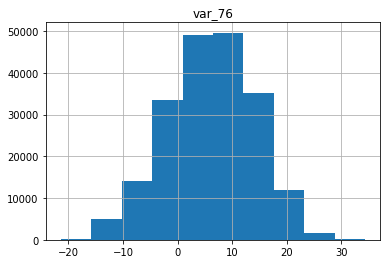

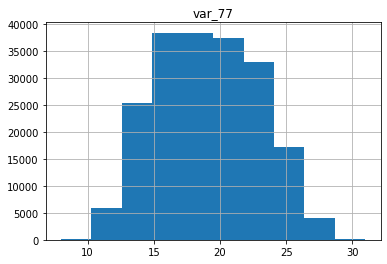

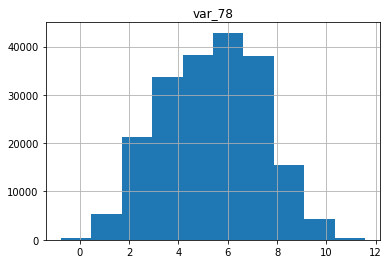

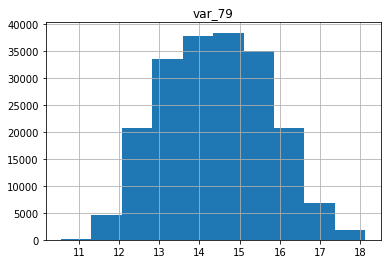

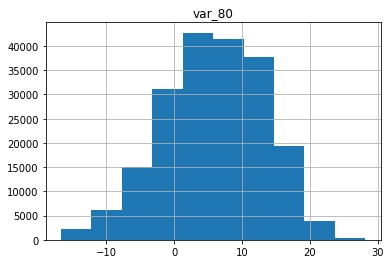

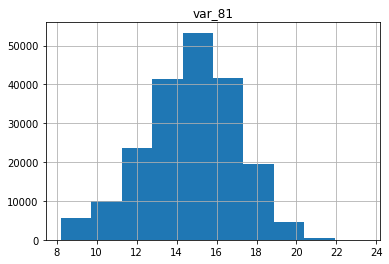

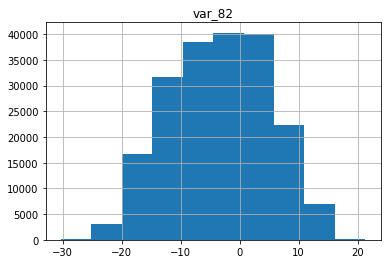

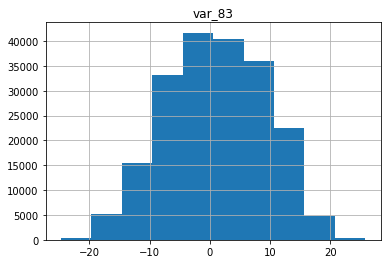

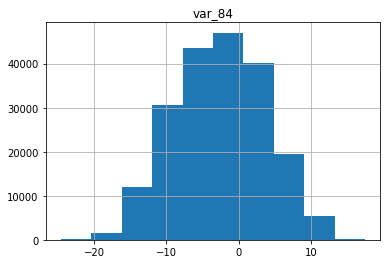

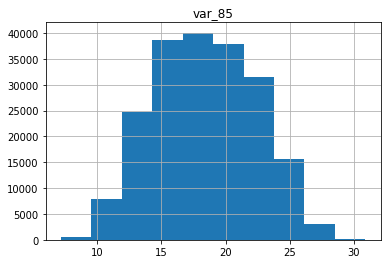

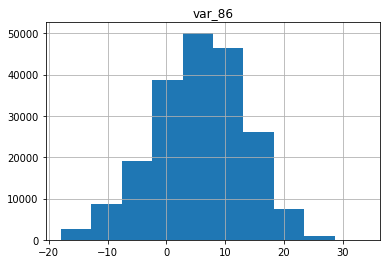

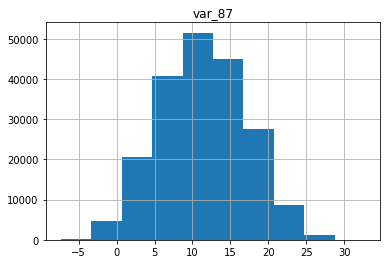

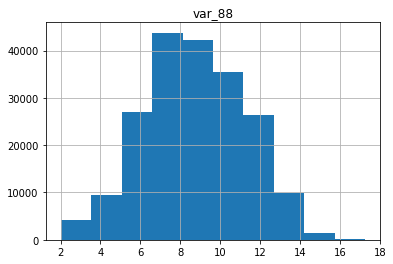

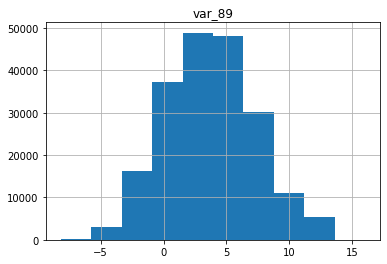

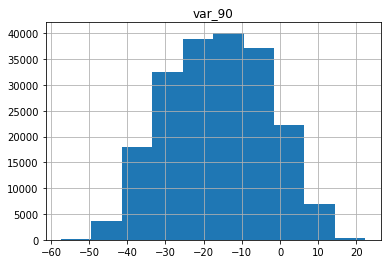

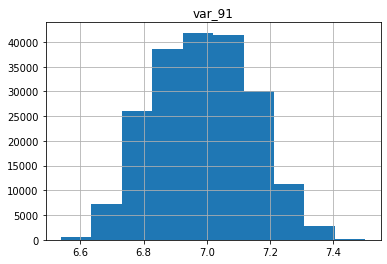

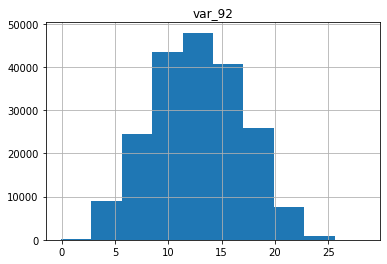

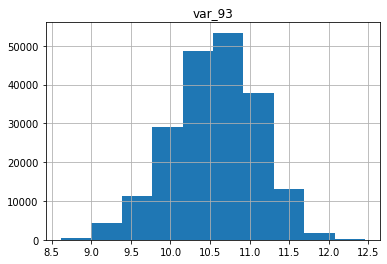

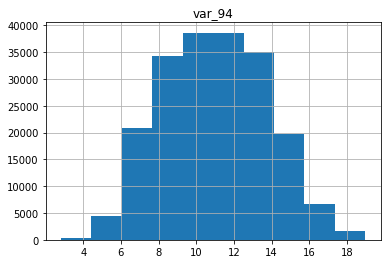

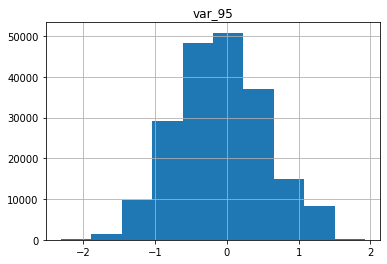

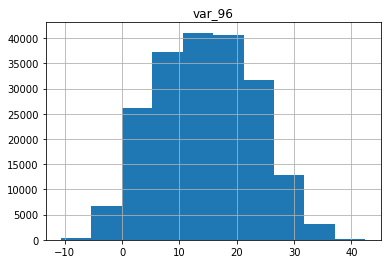

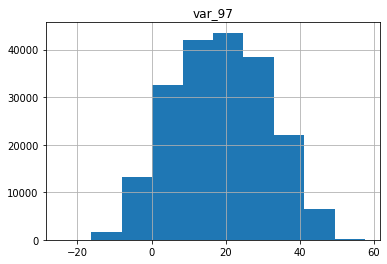

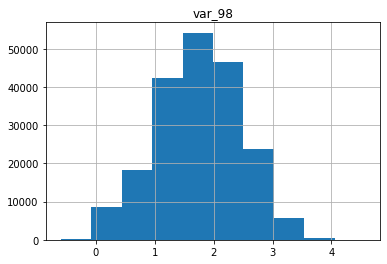

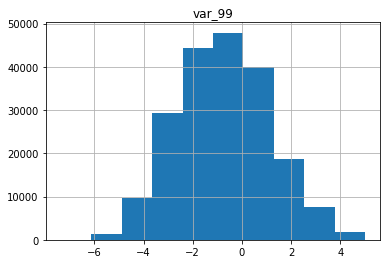

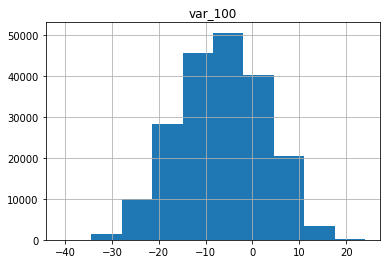

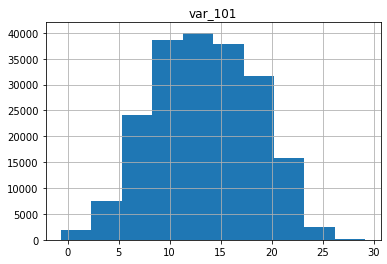

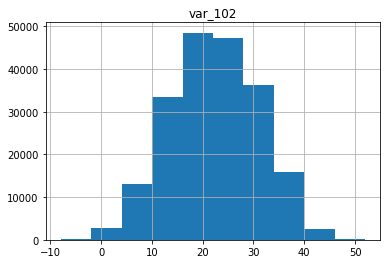

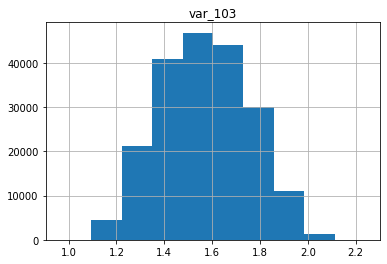

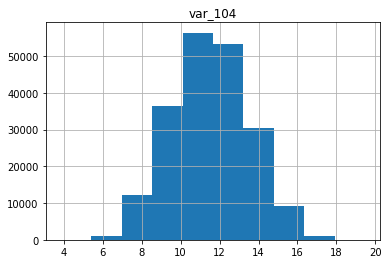

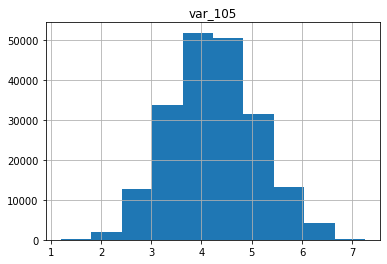

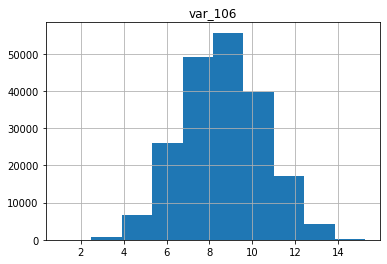

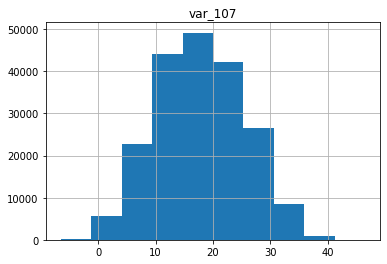

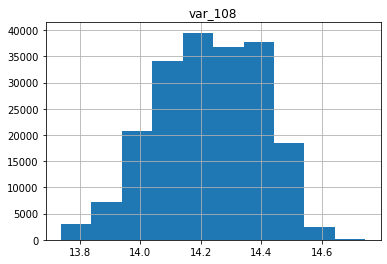

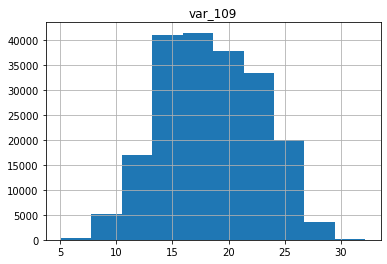

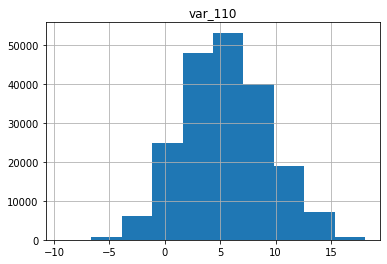

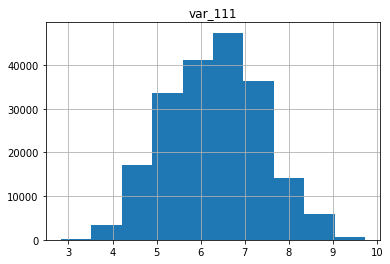

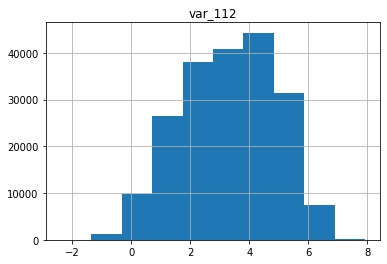

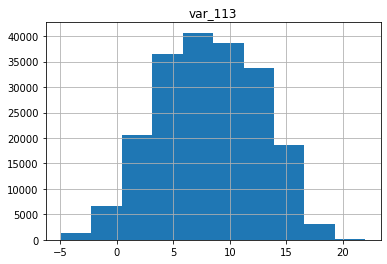

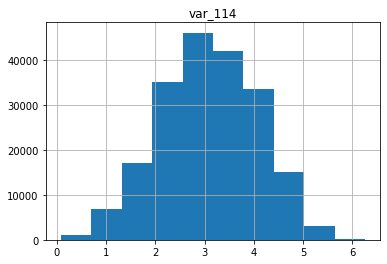

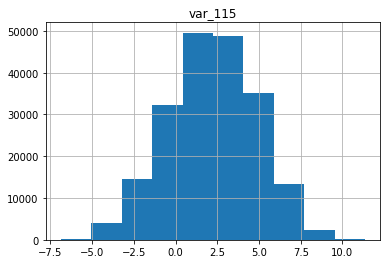

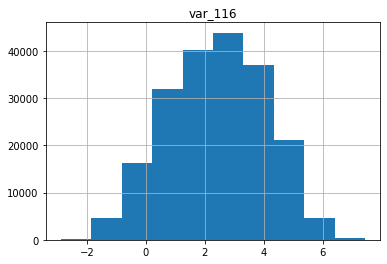

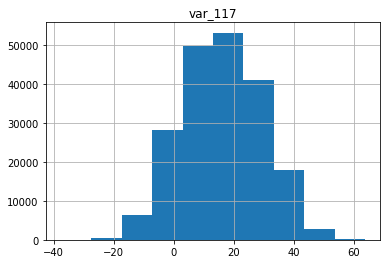

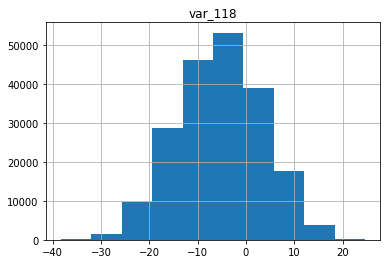

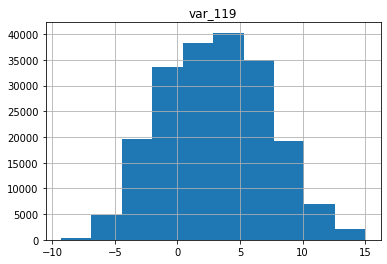

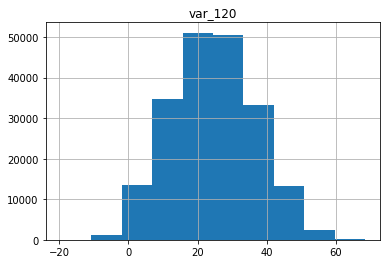

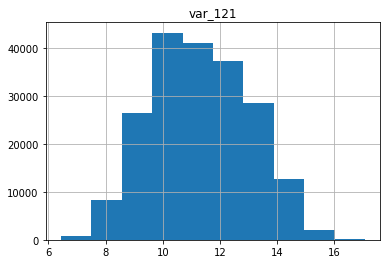

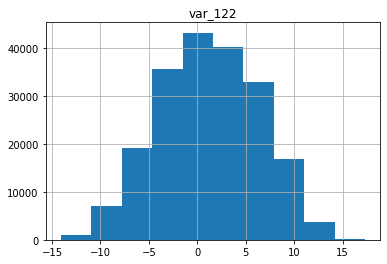

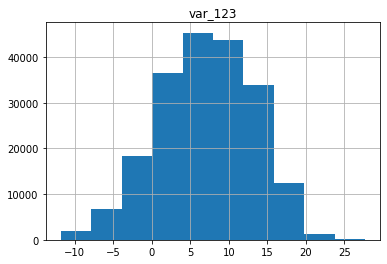

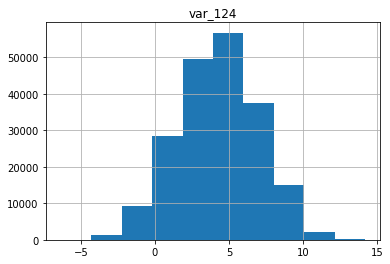

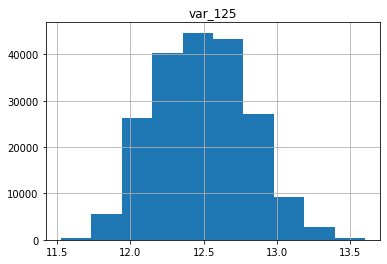

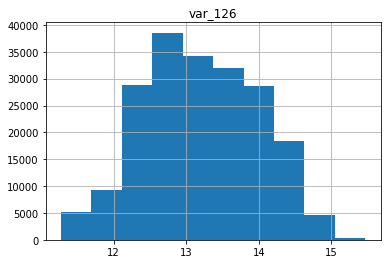

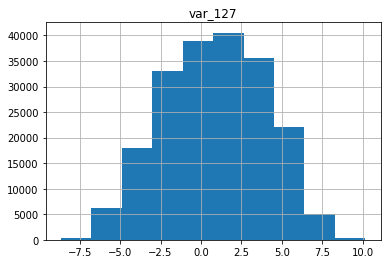

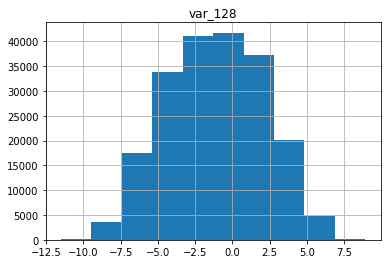

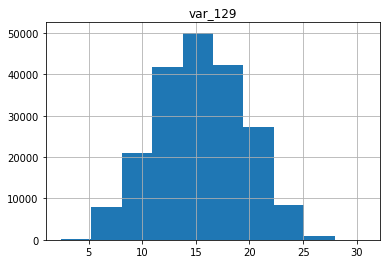

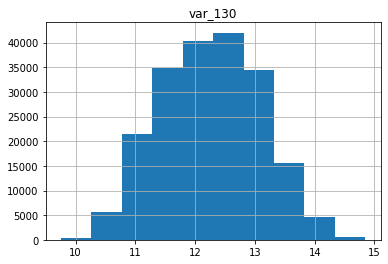

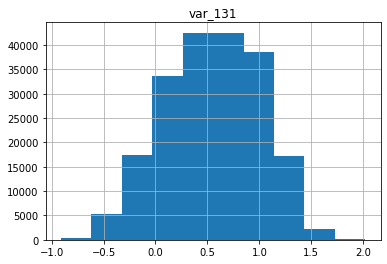

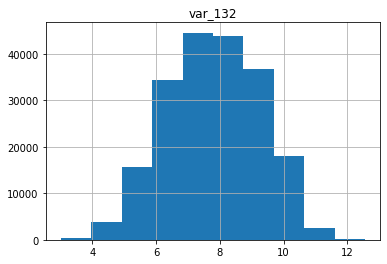

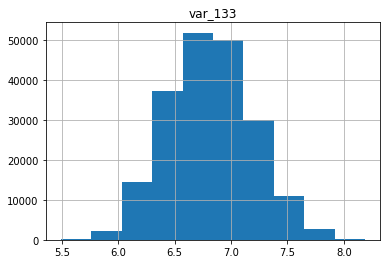

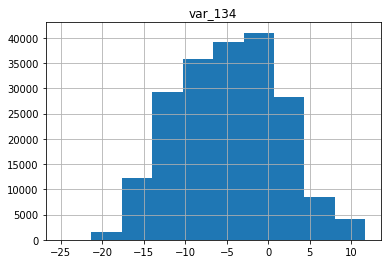

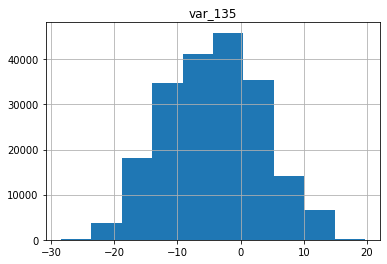

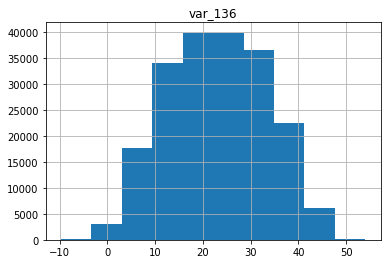

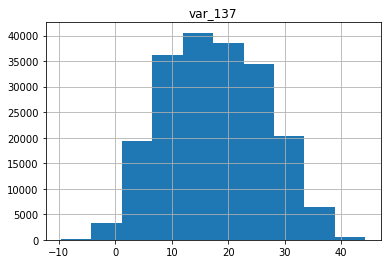

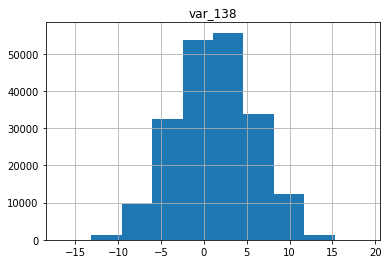

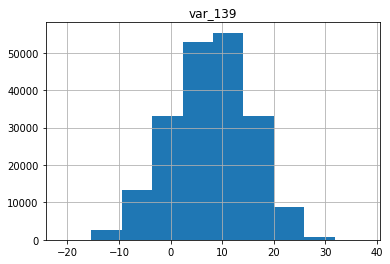

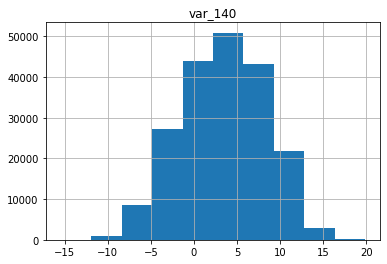

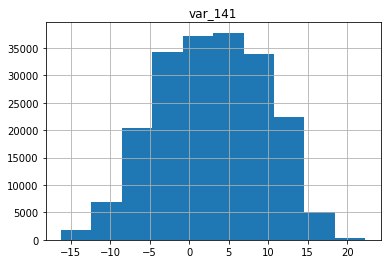

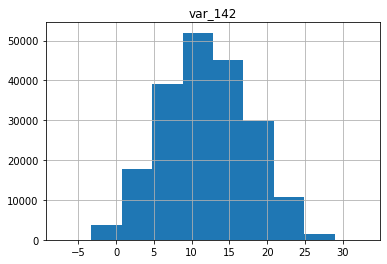

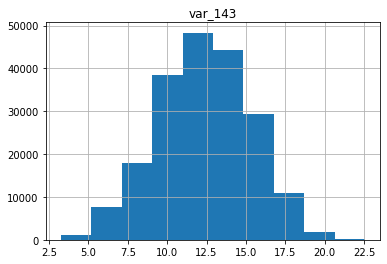

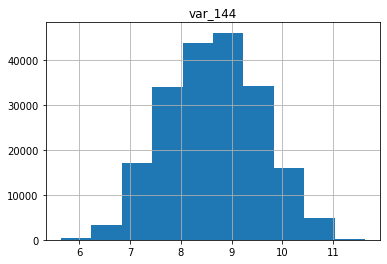

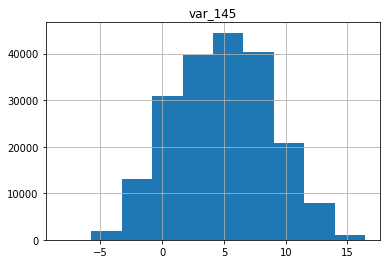

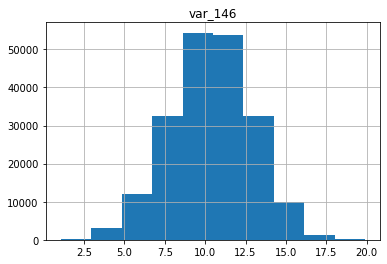

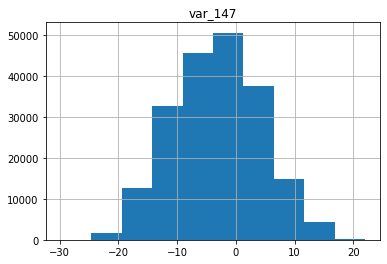

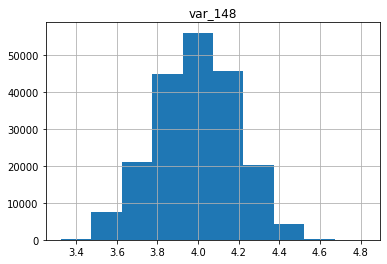

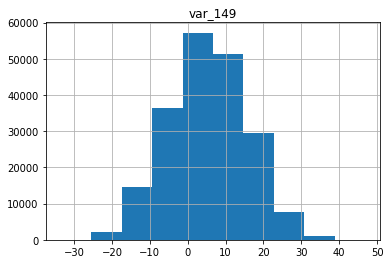

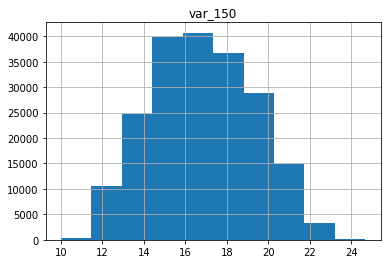

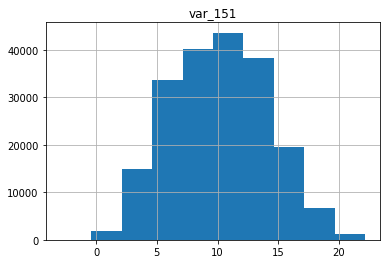

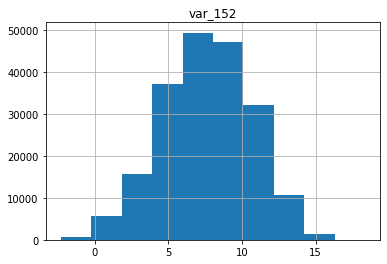

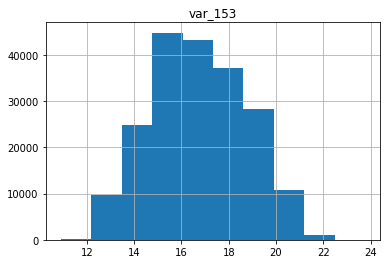

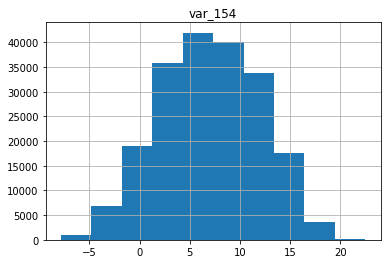

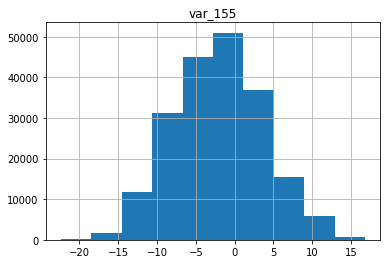

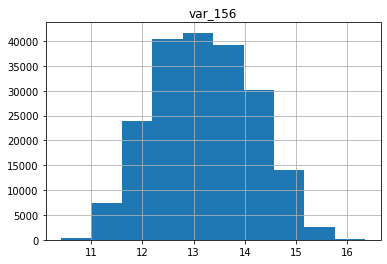

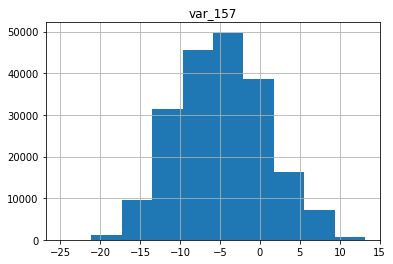

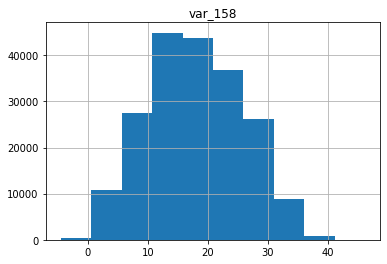

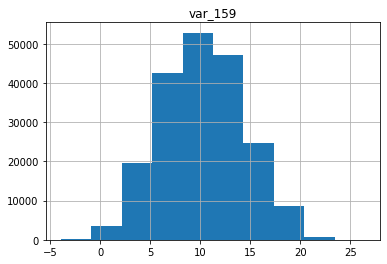

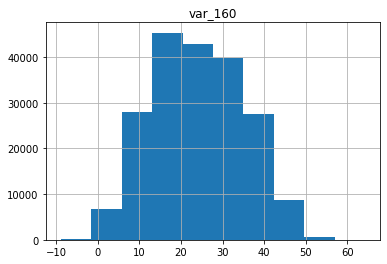

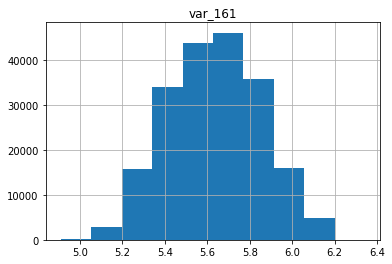

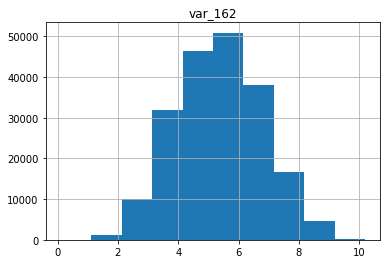

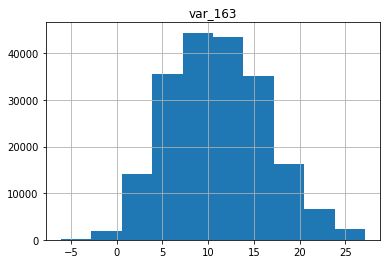

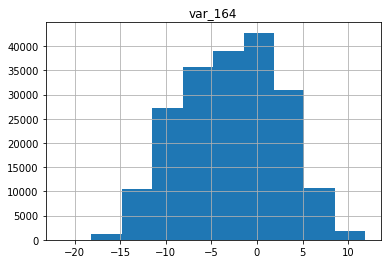

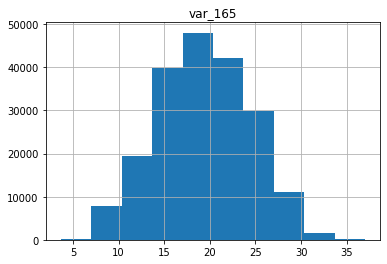

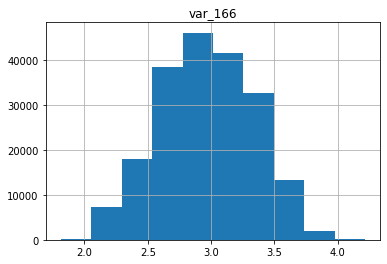

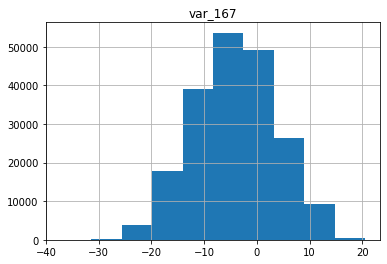

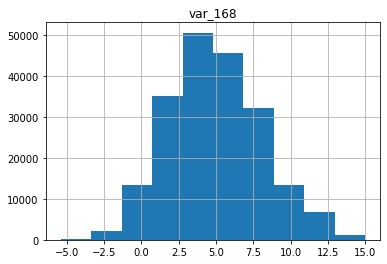

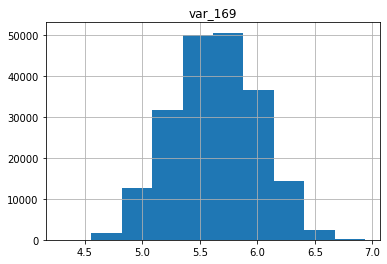

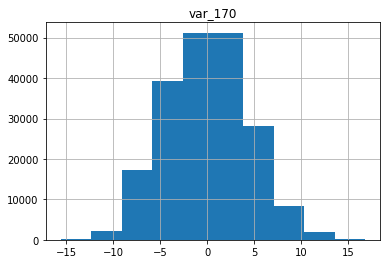

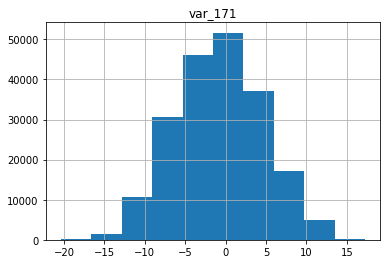

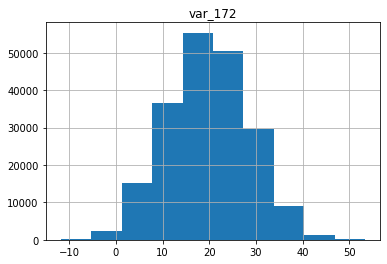

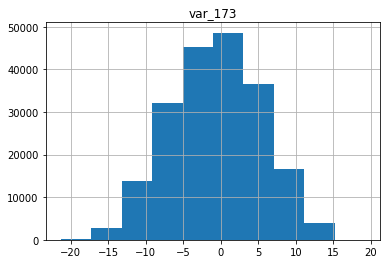

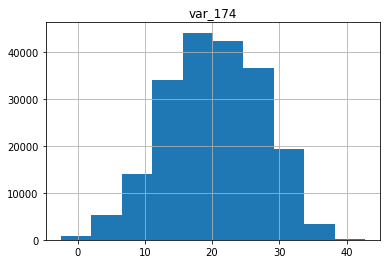

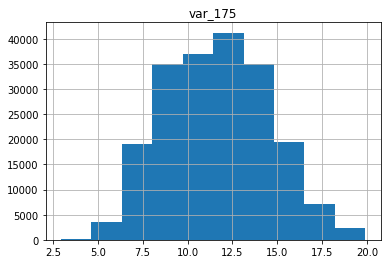

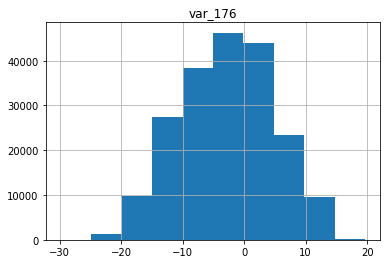

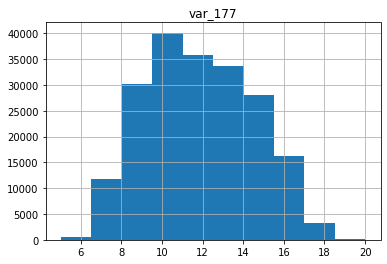

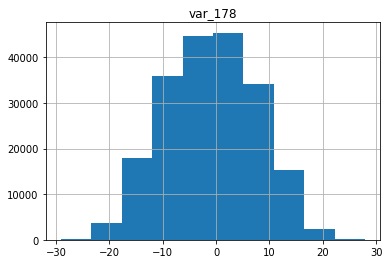

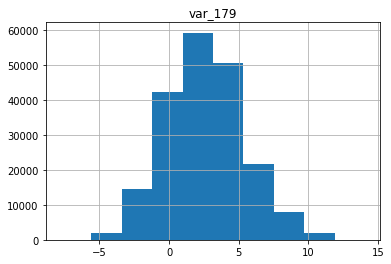

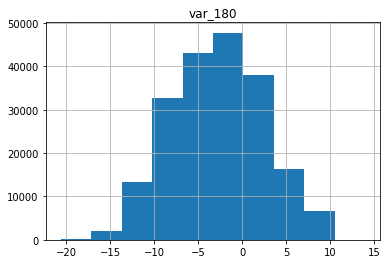

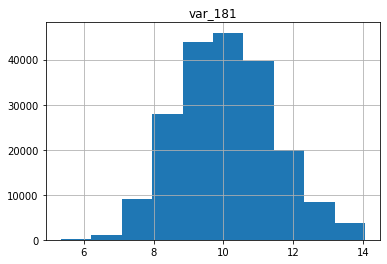

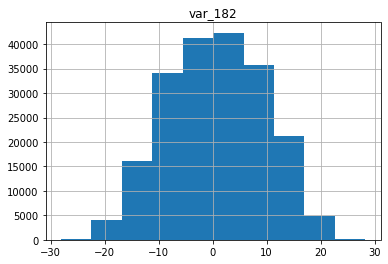

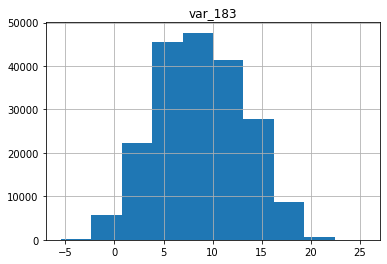

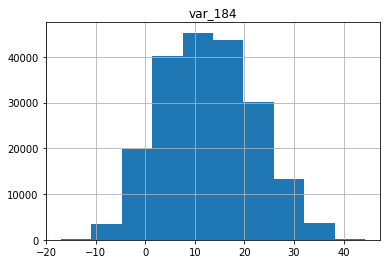

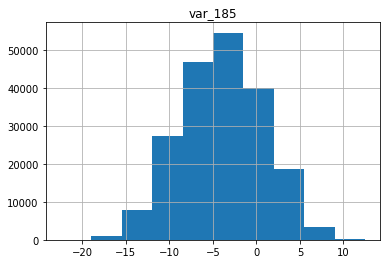

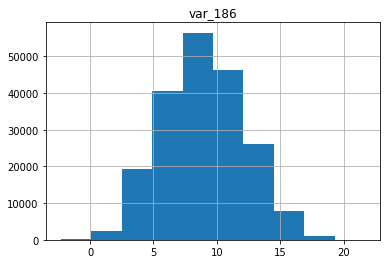

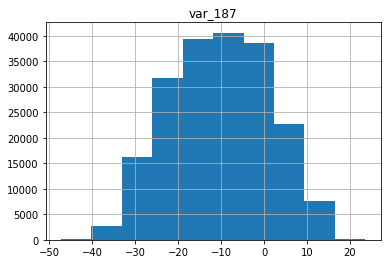

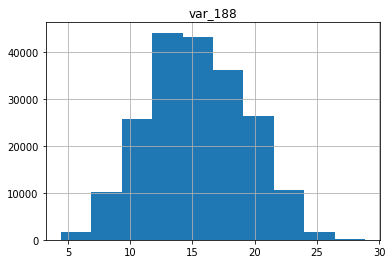

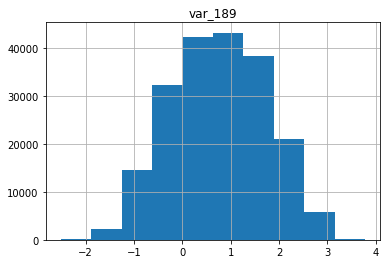

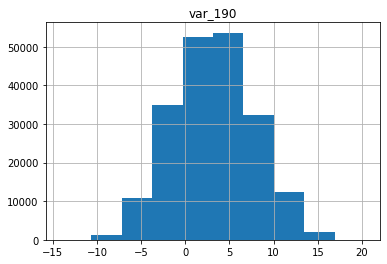

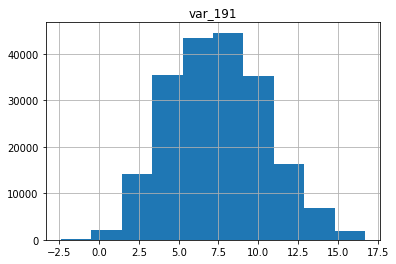

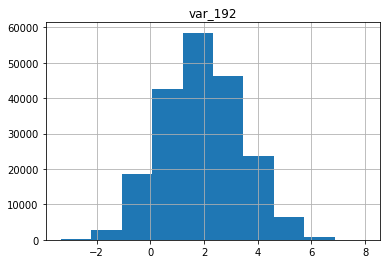

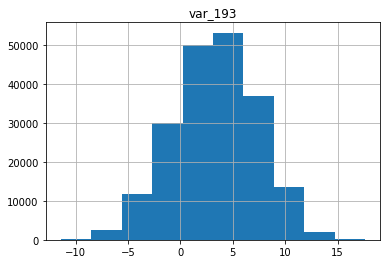

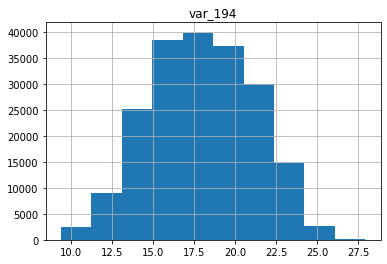

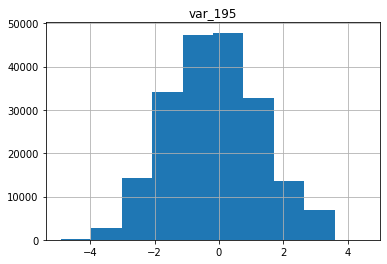

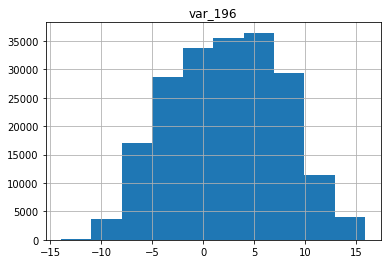

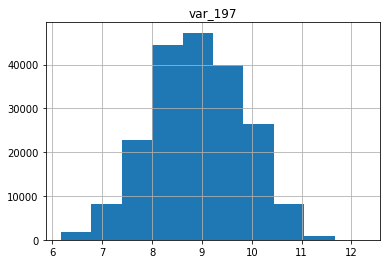

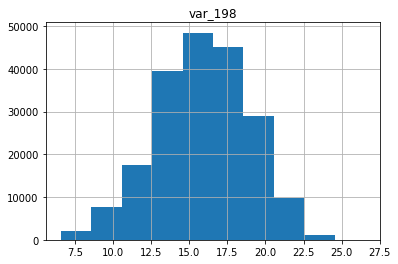

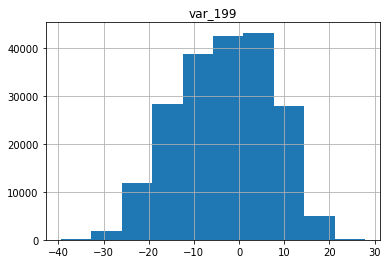

In [17]:
# show histograms of data columns
# select numerical features
train_num_columns = app_test.select_dtypes(include=['int64', 'float64']).columns
print('num_columns =', train_num_columns, '\n')
for col in train_num_columns:
  app_test.hist(col)